## 1.- Import libraries

*Dataset taken from Kaggle*

Credit Card Fraud Detection (Anonymized credit card transactions labeled as fraudulent or genuine)
It contains only numerical input variables which are the result of a PCA transformation + Time' and 'Amount' variables.
This dataset is highly unbalanced, Frauds account for 0.172% of all transactions.

Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
import eli5 
from eli5.sklearn import PermutationImportance
import shap 
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from pdpbox import pdp, info_plots 
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import lightgbm as lgbm
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
import eli5 
from eli5.sklearn import PermutationImportance
import shap 
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
sns.set(style="darkgrid")
%matplotlib inline
plt.style.use('seaborn-talk')

* Load dataset

In [211]:
mainpath = r"C:\Users\dataset"
filename = "creditcard.csv"

df = pd.read_csv(mainpath + "/" + filename)

* Basic description of dataset

In [212]:
print(f"Dataset 'Credit Fraud' with number of rows {df.shape[0]} and columns {df.shape[1]}")

Dataset 'Credit Fraud' with number of rows 284807 and columns 31


In [213]:
cols = df.columns.values.tolist()
print(f"Name of columns {cols}")

Name of columns ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [214]:
print(f"Any nan value?: {pd.isnull(df).values.any()}")

Any nan value?: False


In [215]:
assert pd.notnull(df).all().all()

In [216]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [217]:
for i in cols:
    print(f"Data type for column: {i} is : {df[i].dtypes}")

Data type for column: Time is : float64
Data type for column: V1 is : float64
Data type for column: V2 is : float64
Data type for column: V3 is : float64
Data type for column: V4 is : float64
Data type for column: V5 is : float64
Data type for column: V6 is : float64
Data type for column: V7 is : float64
Data type for column: V8 is : float64
Data type for column: V9 is : float64
Data type for column: V10 is : float64
Data type for column: V11 is : float64
Data type for column: V12 is : float64
Data type for column: V13 is : float64
Data type for column: V14 is : float64
Data type for column: V15 is : float64
Data type for column: V16 is : float64
Data type for column: V17 is : float64
Data type for column: V18 is : float64
Data type for column: V19 is : float64
Data type for column: V20 is : float64
Data type for column: V21 is : float64
Data type for column: V22 is : float64
Data type for column: V23 is : float64
Data type for column: V24 is : float64
Data type for column: V25 is : fl

In [218]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

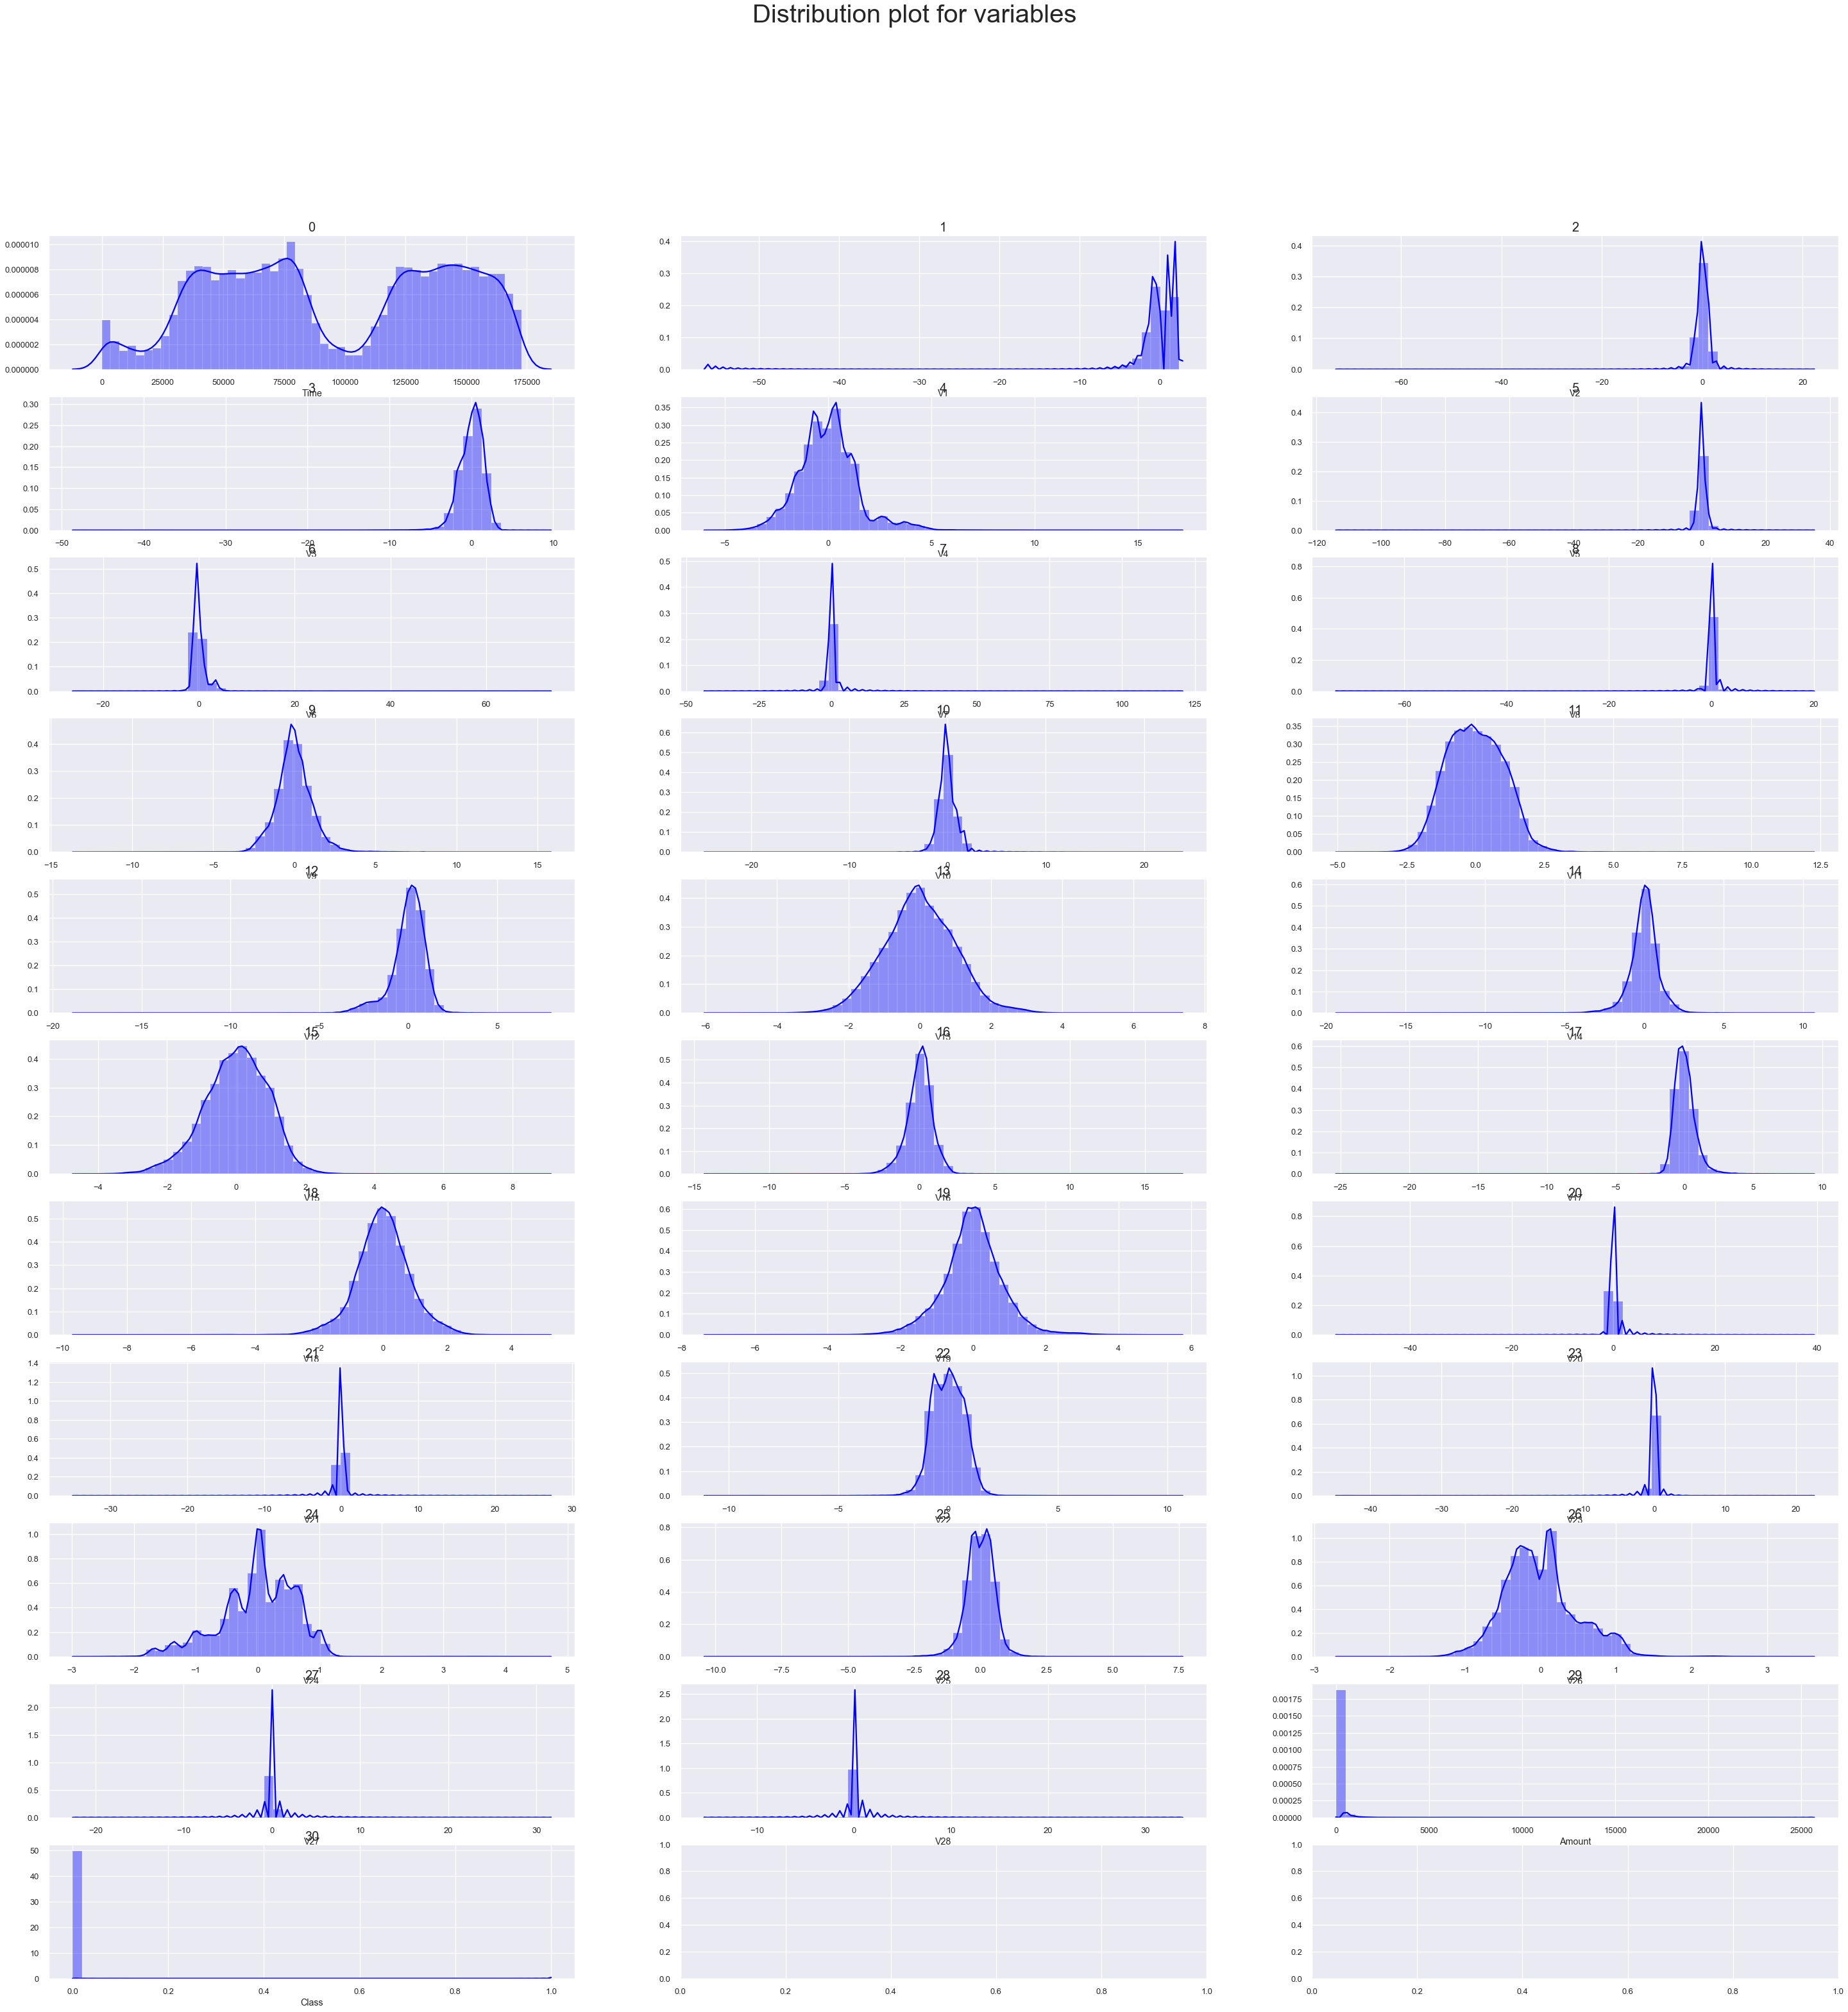

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [219]:
fig, ax = plt.subplots(11,3, figsize = (50,50))
for i in range(len(cols)):
    plt.subplot(11,3, i+1)
    sns.distplot(df.iloc[:,i], kde=True, color="blue")
    plt.title(f"{i}", fontsize=20)
plt.suptitle("Distribution plot for variables", fontsize=40)    
plt.show()
plt.tight_layout

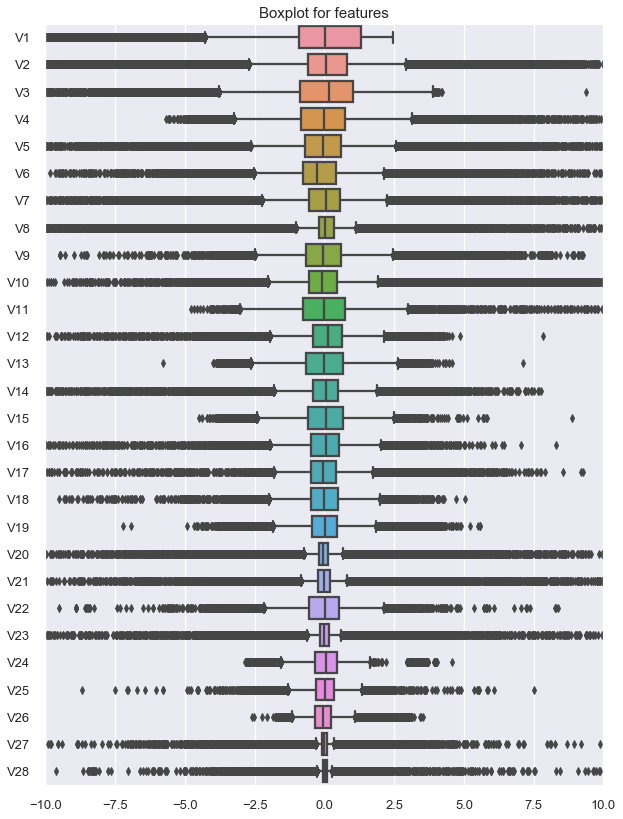

In [220]:
fig, ax = plt.subplots(figsize=(10,14))

plt.title("Boxplot for features", fontsize=15)
ax.set(xlim=(-10,10))
ax = sns.boxplot(data=df.drop(columns=["Time", "Amount", "Class"]), orient="h")

In [221]:
for i in cols:
    if df[i].nunique()<10:
        print(f"Variable : {i} with values: {df[i].unique()}")

Variable : Class with values: [0 1]


* Target variable

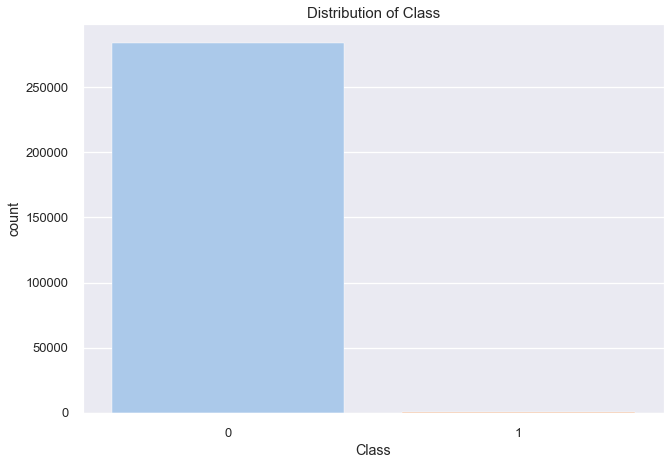

In [222]:
sns.countplot("Class", data=df, palette="pastel")
plt.title("Distribution of Class", fontsize=15)
plt.show()

In [224]:
print(f"Non Fraud %: {round((df['Class'].value_counts()[0]) / len(df), 3)}")
print(f"Non Fraud %: {round((df['Class'].value_counts()[1]) / len(df), 3)}")   

Non Fraud %: 0.998
Non Fraud %: 0.002


Target variable is heavily umbalanced. Most of machine algos (with exception of Decission Trees) works better with less variance in the classes because they are able to learn with an adequate number of date for each class and we prevent getting very high and misleading accuracies. We have to think in possibilities to handle this issue. 

* Relation with target variable

In [225]:
def plot_dis(df, variable):
    sns.distplot(df[df["Class"]==1][variable], color="red", label="Fraud")
    sns.distplot(df[df["Class"]==0][variable], color="green", label="Non Fraud") 
    plt.title(f"Variable {variable}")
    plt.legend()

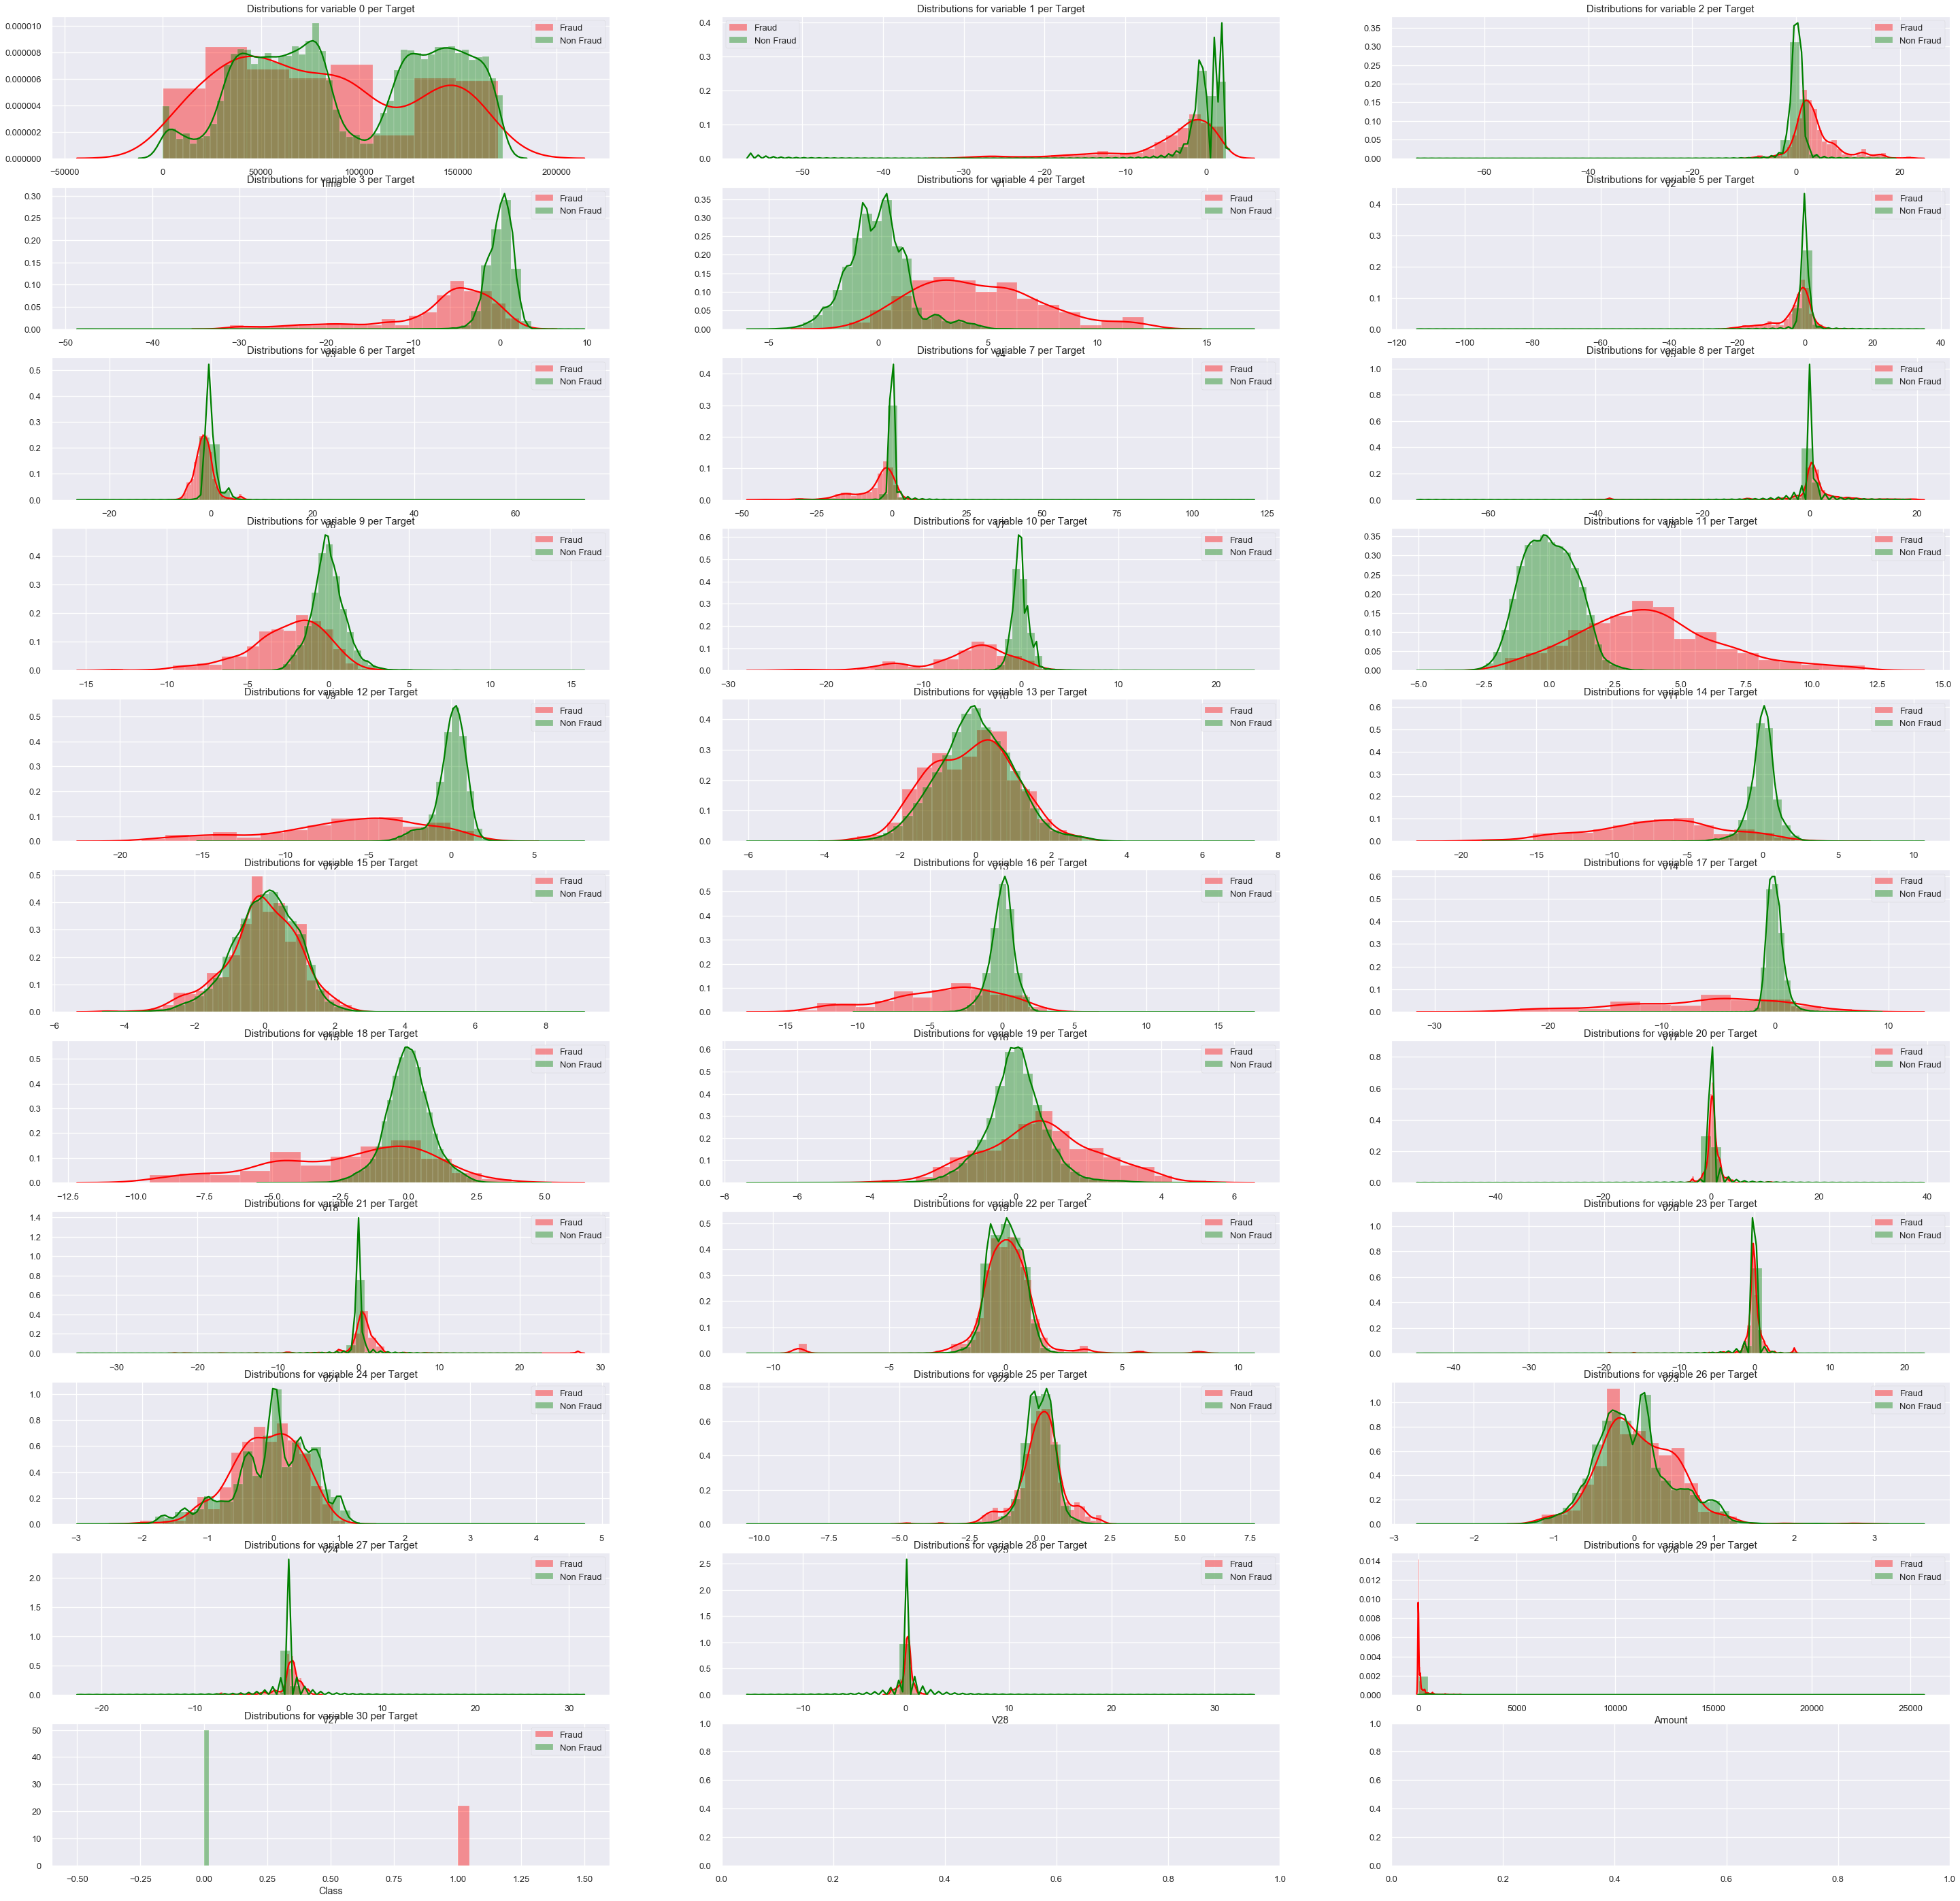

In [226]:
fig, ax = plt.subplots(11,3, figsize = (50,50))
for i in range(len(cols)):
    plt.subplot(11,3, i+1)
    plot_dis(df, cols[i])
    plt.title(f"Distributions for variable {i} per Target", fontsize=15)
plt.show()

* Correlations

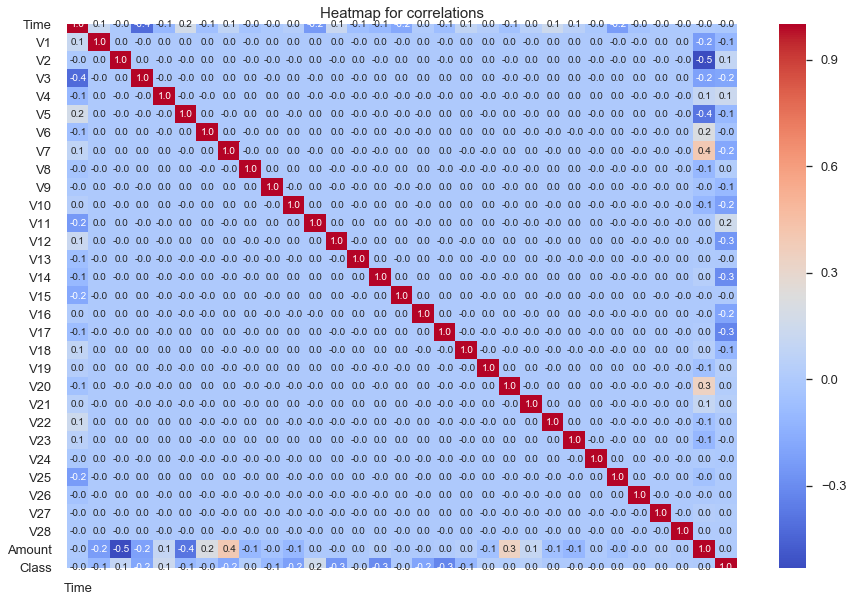

In [227]:
d_cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(d_cor, cmap="coolwarm", cbar=True, annot=True, xticklabels=90, fmt=".1f")
plt.title("Heatmap for correlations", fontsize=15)
plt.show()

In [228]:
threshold = 0.35
cor_list = []

for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        if (d_cor.iloc[i,j]<1 and d_cor.iloc[i,j]>threshold) or (d_cor.iloc[i,j]<0 and d_cor.iloc[i,j]<-threshold):
            cor_list.append([d_cor.iloc[i,j], i,j])

In [229]:
sorted_cor_list  = sorted(cor_list, key=lambda x : abs(x[0]))

In [230]:
for v, i, j in cor_list:
    print(f"Variable {i} and variable {j} with correlation value: {v}")

Variable 0 and variable 3 with correlation value: -0.4196181722115274
Variable 2 and variable 29 with correlation value: -0.5314089393279761
Variable 5 and variable 29 with correlation value: -0.3863562561629983
Variable 7 and variable 29 with correlation value: 0.3973112781816456


In [231]:
d_cor["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

* Amount variable analysis

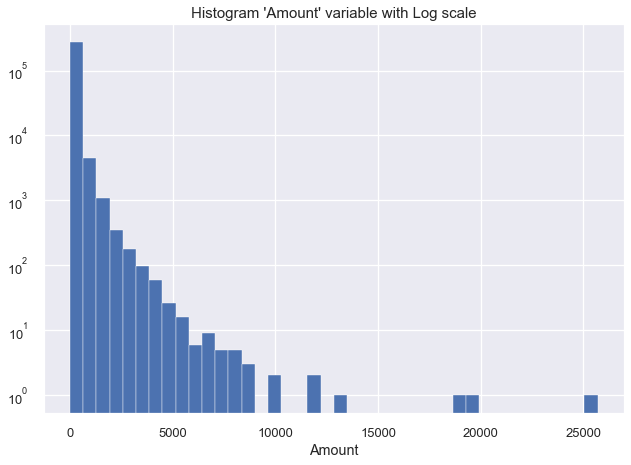

In [232]:
plt.hist(x="Amount", data=df, bins= 40, log=True)
plt.title("Histogram 'Amount' variable with Log scale", fontsize=15)
plt.xlabel("Amount")
plt.show()

In [233]:
print(f"Min value: {df['Amount'].min()},\n Max value: {df['Amount'].max()},\n Mode: {df['Amount'].mode()}\n 25 % percentile {np.percentile(df['Amount'], 25)},\n 75 % percentile {np.percentile(df['Amount'], 75)},\n 99 % percentile {np.percentile(df['Amount'], 99)}")

Min value: 0.0,
 Max value: 25691.16,
 Mode: 0    1.0
dtype: float64
 25 % percentile 5.6,
 75 % percentile 77.16499999999999,
 99 % percentile 1017.9700000000012


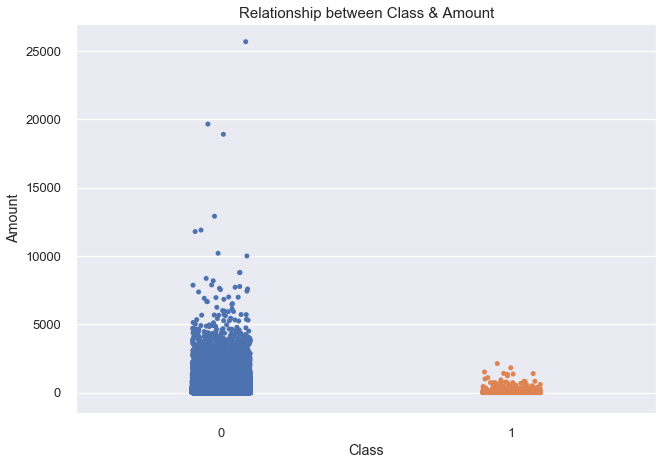

In [234]:
sns.stripplot(x="Class", y="Amount", data=df)
plt.title("Relationship between Class & Amount", fontsize=15)
plt.show()

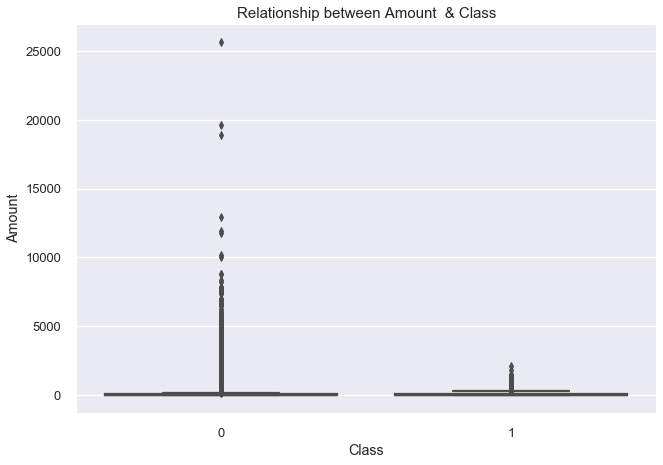

In [235]:
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Relationship between Amount  & Class", fontsize=15)
plt.show()

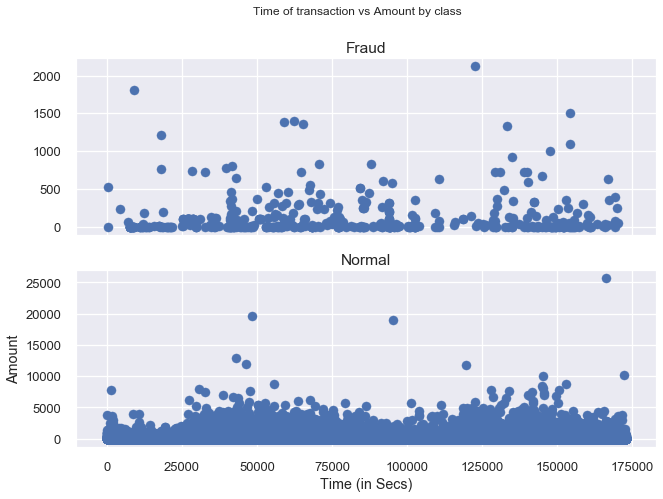

In [237]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df[df["Class"]==1]["Time"], df[df["Class"]==1]["Amount"])
ax1.set_title('Fraud')
ax2.scatter(df[df["Class"]==0]["Time"], df[df["Class"]==0]["Amount"])
ax2.set_title('Normal')
plt.xlabel('Time (in Secs)')
plt.ylabel('Amount')
plt.show()

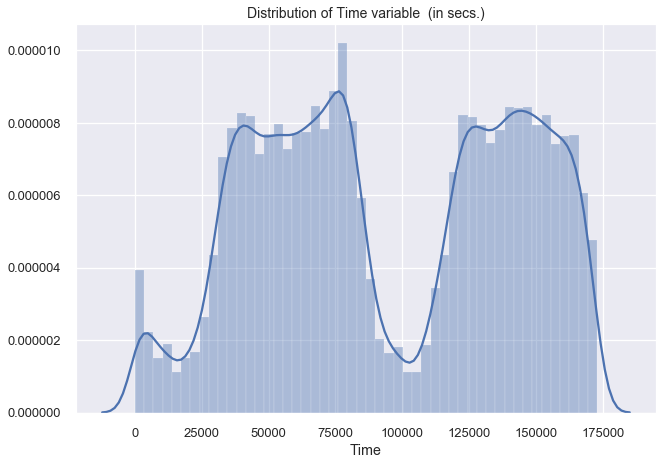

In [238]:
sns.distplot(df["Time"])
plt.title("Distribution of Time variable  (in secs.)", fontsize=14)
plt.show()

## 2.-  Split the dataset into training and test 

In [239]:
X = df.drop("Class", axis=1)
y = df["Class"]

randomstate= 43

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)

* Standard Scaler applied to variables Time & Amount

StandardScaler belongs to sklearn preprocessing package and it should be applied to our variables "Time" and "Amount" because the range for these variables is much greater than for the other features. It is key to work in a similar scale to feed most of our machine learning algos (mostly for distance-based classifiers).

In [240]:
sc = StandardScaler()

X_train["scal_time"] = sc.fit_transform(X_train["Time"].values.reshape(-1,1))
X_train["scal_amount"]  = sc.fit_transform(X_train["Amount"].values.reshape(-1,1))

X_test["scal_time"] = sc.transform(X_test["Time"].values.reshape(-1,1))
X_test["scal_amount"] = sc.transform(X_test["Amount"].values.reshape(-1,1))


X_train.drop(["Time", "Amount"], axis=1, inplace=True)
X_test.drop(["Time", "Amount"], axis=1, inplace=True)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

print(f"Number of 0 labels for y_train: {sum(y_train==0)} and Number of 1 labels for y_train: {sum(y_train==1)}")

X_train shape: (227845, 30), X_test shape: (56962, 30), y_train shape: (227845,), y_test shape: (56962,)
Number of 0 labels for y_train: 227459 and Number of 1 labels for y_train: 386


## 3.- Applying SMOTE

In [241]:
sm = SMOTE(random_state=randomstate)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print(f"After SMOTE: Number of 0 labels for y_train: {sum(y_train_sm==0)} and Number of 1 labels for y_train: {sum(y_train_sm==1)}")

After SMOTE: Number of 0 labels for y_train: 227459 and Number of 1 labels for y_train: 227459


In [242]:
print(f"Original data: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_train_sm)}")

Original data: Counter({0: 227459, 1: 386})
After SMOTE: Counter({0: 227459, 1: 227459})


In [243]:
cnt = Counter(y_train_sm)

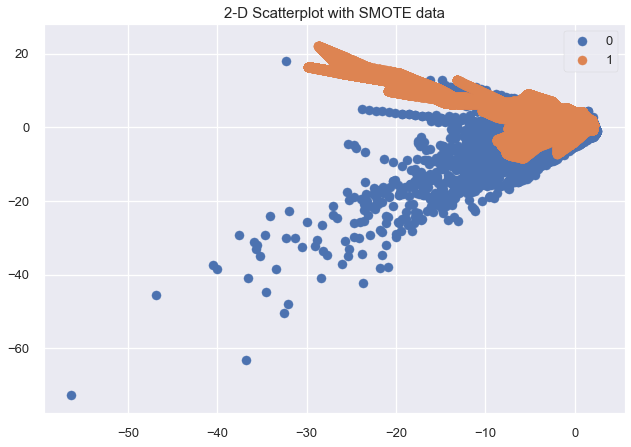

In [244]:
for lab, _ in cnt.items():
    idx = where(y_train_sm==lab)[0]
    plt.scatter(X_train_sm.iloc[idx,0], X_train_sm.iloc[idx,1], label=lab)
plt.title("2-D Scatterplot with SMOTE data", fontsize=15)
plt.legend()
plt.show()

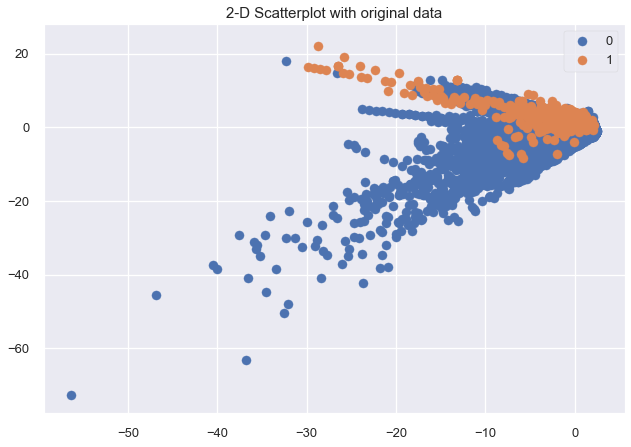

In [245]:
for lab, _ in cnt.items():
    idx = where(y_train==lab)[0]
    plt.scatter(X_train.iloc[idx,0], X_train.iloc[idx,1], label=lab)
plt.title("2-D Scatterplot with original data", fontsize=15)
plt.legend()
plt.show()

## 4.- Pipelines of classification models with GridSearch cross validation of parameters

In [246]:
n_jobs= -1

p_lr = Pipeline([("lr", LogisticRegression(random_state=randomstate, n_jobs=n_jobs, max_iter=250))])
p_knn = Pipeline([("knn", KNeighborsClassifier(n_jobs=n_jobs))])
p_rf = Pipeline([("rf", RandomForestClassifier(random_state=randomstate, n_jobs=n_jobs, oob_score=True))])
p_bag = Pipeline([("bag", BaggingClassifier(random_state=randomstate, n_jobs=n_jobs, oob_score=True))])

In [247]:
cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=randomstate)

In [248]:
params_lr = [{
                'lr__penalty': ['l2'],
                'lr__C': [0.1, 0.2, 0.3],
                'lr__solver': ['lbfgs']  
}]

gs_lr = GridSearchCV(p_lr, param_grid=params_lr, scoring='accuracy', cv=cv) 

* LogisticRegression

L2  (Ridge Regression), which means that adds an square magnitude to loss function. It is chosen because data is not sparse and because usually minimizes the error prediction.

C: Inverse regularization to reduce overfitting. This matters a lot in this dataset because it is really small.

Solver: Using the default one 'lbfgs' which handles L2 penalty after no getting convergence with 'sag'

In [249]:
params_knn = [{'knn__n_neighbors': [9, 15, 31]}]

gs_knn = GridSearchCV(p_knn, param_grid=params_knn, scoring='accuracy', cv=cv) 

* KNeighborsClassifier

5 is the default value for number of neighbors but we are trying to play with different odd numbers.

In [250]:
params_rf = [{
                'rf__criterion': ['gini'],
                'rf__min_samples_leaf': [1, 10, 50],
                'rf__max_depth': [3, 20],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [80, 110]
                }]

gs_rf = GridSearchCV(p_rf, param_grid=params_rf, scoring='accuracy', cv=cv) 

* Ramdom Forest

'Gini' : Gini and Entropy are almost the same but we prefer to use'Gini' because it is less computatinal intensive due to logaritmic calculations.

'Min_samples_leaf' : We include the default value of 1 and also consider much greater values to try to get the right balance in order to avoid underfitting and overfitting.

'Max_depth' : We avoid the default value of "None" and instead work with a little value of 3 to try to get as much information as possible and on ther other hand a greater value to avoid overfitting.

'Min_samples_split' : We increase a little the default value from 2 to 3 or 5 to make the split.

'n_estimators' : Trying to balance the ability to learn from data with more estimators but taking into account this could slow down.

In [251]:
params_bag = [{'bag__n_estimators': [10, 15, 25]}]
gs_bag = GridSearchCV(p_bag, param_grid=params_bag, scoring='accuracy', cv=cv) 

* Bagging Classifier

'n_estimators' : Playing with the default value of 10 but also trying with greater values to get better predictions and taking into account this slow down the computation.

In [252]:
models = [gs_lr, gs_knn, gs_rf, gs_bag]
model_name  = {0: "Logistic_Reg.", 1: "KNeighbors", 2:"RandomForest", 3:"Bagging Clas"}

In [253]:
for index, mod in enumerate(models):
     print(f"Working on model: {model_name[index]}")
     mod.fit(X_train_sm, y_train_sm)
     print(f"Best parameters: {mod.best_params_}")
     print(f"Best score: {mod.best_score_}")
     print(f"Accuracy rate: {mod.score(X_test, y_test)}")
     auc = roc_auc_score(y_test, mod.predict_proba(X_test)[:,1])
     print(f"AUC : {auc}")

Working on model: Logistic_Reg.
Best parameters: {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best score: 0.9450450432813333
Accuracy rate: 0.9982971103542713
AUC : 0.7295431556982088
Working on model: KNeighbors
Best parameters: {'knn__n_neighbors': 9}
Best score: 0.9984722521904208
Accuracy rate: 0.9990871107053826
AUC : 0.8724520204634815
Working on model: RandomForest
Best parameters: {'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 110}
Best score: 0.999850522395775
Accuracy rate: 0.999385555282469
AUC : 0.9953965961011068
Working on model: Bagging Clas
Best parameters: {'bag__n_estimators': 25}
Best score: 0.9994372610853887
Accuracy rate: 0.9990519995786665
AUC : 0.9396562251938695


## 5.- Exploring LGBM

LightGBM is one of the favourite algos due to their performance so we have to be carefull with overfitting as this dataset is really small.
It uses gradient boosting based on trees with a leaf-wise tree growth and therefore is capable of reducing more loss in comparison to the classic level-wise tree growth when "early_stopping_rounds" and "prunning" is correctly defined.

In [111]:
lgbm_clf = lgbm.LGBMClassifier(n_estimators=2, random_state=randomstate, early_stopping_rounds=40, eval_metric= 'binary')

lgbm_param = {'learning_rate' : [0.01, 0.02, 0.04, 0.05,0.1, 0.2, 0.3, 0.4],
              'min_child_weight': [1, 3, 5, 7, 9],
              'max_depth': [1, 2, 3, 4, 5, 6, 7,13],
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50]}

r_s_lgbm = RandomizedSearchCV(lgbm_clf , param_distributions=lgbm_param, n_iter=100, cv=5, n_jobs=-1, scoring="accuracy", random_state=randomstate)

r_s_lgbm.fit(X_train_sm, y_train_sm, eval_set=[(X_test, y_test)])

print(f'Best score for LightGBM: {r_s_lgbm.best_score_} with parameters: {r_s_lgbm.best_params_}')

best_parameters =  r_s_lgbm.best_params_

scores = cross_val_score(lgbm_clf, X_train_sm, y_train_sm, scoring = 'accuracy', cv=5)

y_pred = r_s_lgbm.predict(X_test)

[1]	valid_0's binary_logloss: 0.533304
Training until validation scores don't improve for 40 rounds
[2]	valid_0's binary_logloss: 0.422541
Did not meet early stopping. Best iteration is:
[2]	valid_0's binary_logloss: 0.422541
Best score for LightGBM: 0.9676073510791078 with parameters: {'reg_lambda': 5, 'reg_alpha': 1, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.2}


In [187]:
y_score = r_s_lgbm.predict_proba(X_test)[:,1]

In [204]:
model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
fpr, tpr, t = roc_curve(y_test, y_score)
auc_figure = go.Scatter(x = fpr, y = tpr, line = dict(color = ('rgb(22, 96, 167)'), width = 2), fill='tozeroy')
fig = go.Figure(data=auc_figure)
fig.show()

In [121]:
c_matrix = confusion_matrix(y_test, y_pred)
tp = c_matrix[1,1]
fn = c_matrix[1,0]
fp = c_matrix[0,1]
tn = c_matrix[0,0]
Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
Precision =  (tp/(tp+fp))
Recall    =  (tp/(tp+fn))
F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
metrics = metrics.T

In [138]:
x = go.Bar(x = (metrics[0].values), y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(metrics[0].values,4), orientation = 'h', textposition = 'auto')
fig = go.Figure(data=x)
fig.show()

## 6.- Exploring Xgboost

We are working with this algorithm because currently is one of the most efficient. As explained in "Towards Data Science" the evolution of this algo started with the **Decision Tree**, then we have **Bagging** with a combination of predictions of various decision trees. If we only select a subset of features, we are working with **Random Forest** and if this is applied sequentially taking into account only the ones with better performance we get Boosting. Finally, the errors of these models can be minimized by gradient descent algo. **XGBoost** optimizes this Gradient boosting with parallelization,  tree prunning and appling cross validation at every iteration.

* "max_depth": Trees are pruned with a ‘depth-first’ approach. Trying to be carefull with overfitting with higher values.
* "n_estimators" and "early_stopping_rounds": Again trying to balance an accurate model with a sufficient number of estimators and setting 5 stopping rounds if the validation score stops improving.
* "learning_rate": A wide range from very little ones in which the model will need further time but we ensure more accurate results and greater rates for faster learning.
* "Gamma": Regularization parameter to ensure the loss fuction is being reduced after every iteration.
* "min_child_weight": It is about the minimum sum of weights in a child.

In [140]:
xb = xgboost.XGBClassifier(n_estimators = 100, early_stopping_rounds=5)
xb_params=  {    
    'max_depth': [3, 5, 7, 10, 13, 15],
    'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.25],
    'min_child_weight': [1, 3, 5, 7, 9],
    'gamma': [0.0, 0.1, 0.2]
}

rs_xgboost = RandomizedSearchCV(xb, param_distributions=xb_params, n_iter=8, cv=5, n_jobs=-1, scoring="accuracy")

rs_xgboost.fit(X_train_sm, y_train_sm, eval_set=[(X_test,y_test)])

print(f'Best score for XGBoost: {rs_xgboost.best_score_} with parameters: {rs_xgboost.best_params_}')

cvs_xgb = cross_val_score(rs_xgboost, X_train_sm, y_train_sm, cv=5, scoring = 'accuracy')


[0]	validation_0-error:0.009269
[1]	validation_0-error:0.005899
[2]	validation_0-error:0.005881
[3]	validation_0-error:0.004898
[4]	validation_0-error:0.00409
[5]	validation_0-error:0.003792
[6]	validation_0-error:0.003529
[7]	validation_0-error:0.0033
[8]	validation_0-error:0.002984
[9]	validation_0-error:0.002528
[10]	validation_0-error:0.002212
[11]	validation_0-error:0.001914
[12]	validation_0-error:0.001756
[13]	validation_0-error:0.001703
[14]	validation_0-error:0.00158
[15]	validation_0-error:0.001492
[16]	validation_0-error:0.001457
[17]	validation_0-error:0.001317
[18]	validation_0-error:0.001229
[19]	validation_0-error:0.001088
[20]	validation_0-error:0.001071
[21]	validation_0-error:0.001018
[22]	validation_0-error:0.000983
[23]	validation_0-error:0.000966
[24]	validation_0-error:0.000966
[25]	validation_0-error:0.00093
[26]	validation_0-error:0.000913
[27]	validation_0-error:0.000913
[28]	validation_0-error:0.000825
[29]	validation_0-error:0.000825
[30]	validation_0-error:0

In [141]:
print(f"Cross validation score for Xgboost with SMOTE points:{cvs_xgb}")

Cross validation score for Xgboost with SMOTE points:[0.99972523 0.99983514 0.99969225 0.9997582  0.99960432]


In [189]:
y_pred_xb = rs_xgboost.predict(X_test)
y_score = rs_xgboost.predict_proba(X_test)[:,1]

In [199]:
model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
fpr, tpr, t = roc_curve(y_test, y_score)

In [200]:
auc_figure = go.Scatter(x = fpr, y = tpr, line = dict(color = ('rgb(22, 96, 167)'), width = 2), fill='tozeroy')

In [201]:
fig = go.Figure(data=auc_figure)
fig.show()

In [191]:
c_m_xb = confusion_matrix(y_test, y_pred_xb)

In [147]:
tpxb = c_m_xb[1,1]  
tnxb = c_m_xb[0,0] 
fnxb = c_m_xb[1,0]
fpxb = c_m_xb[0,1]

In [163]:
acc_xb = (tpxb+tnxb)/ (tpxb+tnxb+fnxb+fpxb)
prec_xb = tpxb / (tpxb+fpxb)
rec_xb = tpxb / (tpxb+fnxb)
f1_xb = (2*(((tpxb/(tpxb+fpxb))*(tpxb/(tpxb+fnxb)))/((tpxb/(tpxb+fpxb))+(tpxb/(tpxb+fnxb)))))

In [179]:
metrics_xb = pd.DataFrame(data=[[acc_xb, prec_xb, rec_xb, f1_xb]])
metrics_xb = metrics_xb.T

In [183]:
x_xb = go.Bar(x = (metrics_xb[0].values), y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(metrics_xb[0].values,4), orientation = 'h', textposition = 'auto')
fig = go.Figure(data=x_xb)
fig.show()

## 7.- Exploring Neural Networks

We will now be working with DNN using the Sequential model imported from Keras.
In order to reduce the risk of overfitting we add Dropout layers for the 20% before each Dense layer.
The activation function chosen is rectified linear unit 'relu' which is the most popular one.
The activation function for the last layer is 'sigmoid' because we are dealing with two classes. Nevertheless, it is not clear for me if 'softmax' will be better as it provides us with probabilities. Additionally, sigmoid function seems to be an special case of softmax when there are two classes.

In [97]:
X_train_dnn = X_train.drop("scal_time", axis=1)
X_test_dnn = X_test.drop("scal_time", axis=1)
                           
print(f"X_train for DNN: {X_train_dnn.shape} and X_test for DNN: {X_test_dnn.shape}")

X_train for DNN: (227845, 29) and X_test for DNN: (56962, 29)


In [98]:
def create_model():
    
    model = Sequential()
    model.add(Dense(32, input_dim=29, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), activation='relu'))
    model.add(Dropout(rate=0.20))
    model.add(Dense(2, activation='sigmoid'))
    
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                960       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [99]:
y_train_cat = to_categorical(y_train, num_classes=None)
y_test_cat = to_categorical(y_test, num_classes=None)
print(f"Y_train cat: {y_train_cat.shape} Y_test cat: {y_test_cat.shape}")

Y_train cat: (227845, 2) Y_test cat: (56962, 2)


In [100]:
history=model.fit(X_train_dnn, y_train_cat, validation_data=(X_test_dnn, y_test_cat),epochs=20, batch_size=5, verbose=1)

Train on 227845 samples, validate on 56962 samples
Epoch 1/20


  8075/227845 [>.............................] - ETA: 4:12:13 - loss: 0.6954 - accuracy: 0.0000e+0 - ETA: 29:18 - loss: 0.6901 - accuracy: 0.8600      - ETA: 18:27 - loss: 0.6856 - accuracy: 0.922 - ETA: 13:47 - loss: 0.6806 - accuracy: 0.940 - ETA: 11:24 - loss: 0.6754 - accuracy: 0.950 - ETA: 9:50 - loss: 0.6662 - accuracy: 0.960 - ETA: 8:55 - loss: 0.6558 - accuracy: 0.96 - ETA: 8:18 - loss: 0.6445 - accuracy: 0.97 - ETA: 7:50 - loss: 0.6306 - accuracy: 0.97 - ETA: 7:28 - loss: 0.6158 - accuracy: 0.97 - ETA: 7:09 - loss: 0.5949 - accuracy: 0.98 - ETA: 6:56 - loss: 0.5723 - accuracy: 0.98 - ETA: 6:44 - loss: 0.5501 - accuracy: 0.98 - ETA: 6:31 - loss: 0.5221 - accuracy: 0.98 - ETA: 6:22 - loss: 0.4952 - accuracy: 0.98 - ETA: 6:14 - loss: 0.4702 - accuracy: 0.98 - ETA: 6:06 - loss: 0.4472 - accuracy: 0.98 - ETA: 6:02 - loss: 0.4269 - accuracy: 0.98 - ETA: 5:56 - loss: 0.4058 - accuracy: 0.98 - ETA: 5:51 - loss: 0.3893 - accuracy: 0.98 - ETA: 5:48 - loss: 0.3752 - accuracy: 0.98 - ETA:

 37005/227845 [===>..........................] - ETA: 3:39 - loss: 0.0294 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0294 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0293 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0293 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0292 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0292 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0292 - accuracy: 0.99 - ETA: 3:39 - loss: 0.0291 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0291 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0290 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0290 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0290 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0290 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0289 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0289 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0288 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0288 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0287 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0287 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0287 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0286 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0286 - 

 46780/227845 [=====>........................] - ETA: 3:24 - loss: 0.0249 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0249 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0249 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0248 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0248 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0248 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0248 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0247 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0247 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0247 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0247 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0246 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0246 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0246 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0246 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0246 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0245 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0245 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0245 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0245 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0244 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0244 - 

 56425/227845 [======>.......................] - ETA: 3:11 - loss: 0.0222 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0222 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0222 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0222 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0222 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0222 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0220 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0221 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0220 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0220 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0220 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0220 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0220 - 

 66180/227845 [=======>......................] - ETA: 3:00 - loss: 0.0200 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0199 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0199 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0199 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0199 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0199 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0201 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0201 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0201 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0201 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0201 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0201 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0200 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0200 - 

 75715/227845 [========>.....................] - ETA: 2:48 - loss: 0.0184 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0184 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0184 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0183 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0182 - 

 85220/227845 [==========>...................] - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0168 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0167 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0166 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0166 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0166 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0166 - 

 94895/227845 [===========>..................] - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0158 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0157 - 

104735/227845 [============>.................] - ETA: 2:18 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0156 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0155 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0155 - 

114430/227845 [==============>...............] - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0150 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0149 - 

123850/227845 [===============>..............] - ETA: 1:57 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0145 - 

131975/227845 [================>.............] - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0144 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0145 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0145 - 

140190/227845 [=================>............] - ETA: 1:40 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0142 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0141 - 

148480/227845 [==================>...........] - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0139 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0139 - 

156805/227845 [===================>..........] - ETA: 1:24 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0138 - 

164980/227845 [====================>.........] - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0135 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0134 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0134 - 

173195/227845 [=====================>........] - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0130 - 

181375/227845 [======================>.......] - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - accuracy: 0.998 - ETA: 58s - loss: 0.0127 - a

189535/227845 [=======================>......] - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 50s - loss: 0.0126 - accuracy: 0.998 - ETA: 49s - loss: 0.0126 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0126 - accuracy: 0.998 - ETA: 49s - loss: 0.0126 - accuracy: 0.998 - ETA: 49s - loss: 0.0126 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - accuracy: 0.998 - ETA: 49s - loss: 0.0125 - a

197945/227845 [=========================>....] - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 41s - loss: 0.0124 - accuracy: 0.998 - ETA: 40s - loss: 0.0124 - accuracy: 0.998 - ETA: 40s - loss: 0.0124 - accuracy: 0.998 - ETA: 40s - loss: 0.0124 - accuracy: 0.998 - ETA: 40s - loss: 0.0124 - accuracy: 0.998 - ETA: 40s - loss: 0.0124 - accuracy: 0.998 - ETA: 40s - loss: 0.0123 - accuracy: 0.998 - ETA: 40s - loss: 0.0123 - accuracy: 0.998 - ETA: 40s - loss: 0.0123 - a

206385/227845 [==========================>...] - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 32s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - accuracy: 0.998 - ETA: 31s - loss: 0.0123 - a

214490/227845 [===========================>..] - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 23s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - accuracy: 0.998 - ETA: 22s - loss: 0.0121 - a

223000/227845 [============================>.] - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 14s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - accuracy: 0.998 - ETA: 13s - loss: 0.0121 - a

227845/227845 [==============================] - ETA: 5s - loss: 0.0119 - accuracy: 0.99 - ETA: 5s - loss: 0.0119 - accuracy: 0.99 - ETA: 5s - loss: 0.0119 - accuracy: 0.99 - ETA: 5s - loss: 0.0119 - accuracy: 0.99 - ETA: 5s - loss: 0.0119 - accuracy: 0.99 - ETA: 5s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0119 - accuracy: 0.99 - ETA: 4s - loss: 0.0118 - ac

  8165/227845 [>.............................] - ETA: 23:28 - loss: 0.0034 - accuracy: 1.000 - ETA: 5:18 - loss: 0.0040 - accuracy: 1.000 - ETA: 4:34 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:21 - loss: 0.0034 - accuracy: 1.00 - ETA: 4:15 - loss: 0.0031 - accuracy: 1.00 - ETA: 4:08 - loss: 0.0112 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0104 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0094 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0085 - accuracy: 0.99 - ETA: 4:03 - loss: 0.0078 - accuracy: 0.99 - ETA: 4:04 - loss: 0.0073 - accuracy: 0.99 - ETA: 4:06 - loss: 0.0071 - accuracy: 0.99 - ETA: 4:07 - loss: 0.0067 - accuracy: 0.99 - ETA: 4:08 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:09 - loss: 0.0062 - accuracy: 0.99 - ETA: 4:10 - loss: 0.0061 - accuracy: 0.99 - ETA: 4:11 - loss: 0.0085 - accuracy: 0.99 - ETA: 4:12 - loss: 0.0082 - accuracy: 0.99 - ETA: 4:13 - loss: 0.0081 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0077 - accuracy: 0.99 - ETA: 4:15 - loss: 0.0075 - accuracy: 0.99 - ETA: 4:14 - loss: 0.0074

 35625/227845 [===>..........................] - ETA: 3:50 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:49 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - 

 45145/227845 [====>.........................] - ETA: 3:32 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:30 - loss: 0.0097 - 

 54895/227845 [======>.......................] - ETA: 3:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0087 - 

 64365/227845 [=======>......................] - ETA: 3:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0084 - 

 72610/227845 [========>.....................] - ETA: 2:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - 

 80730/227845 [=========>....................] - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - 

 88935/227845 [==========>...................] - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:41 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0082 - 

 97090/227845 [===========>..................] - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:32 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:32 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:32 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:32 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:32 - loss: 0.0080 - 

105385/227845 [============>.................] - ETA: 2:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0078 - 

113590/227845 [=============>................] - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0078 - 

121795/227845 [===============>..............] - ETA: 2:08 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - 

130030/227845 [================>.............] - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0080 - 

138170/227845 [=================>............] - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0084 - 

146430/227845 [==================>...........] - ETA: 1:42 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:41 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - 

154700/227845 [===================>..........] - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0085 - 

162905/227845 [====================>.........] - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0085 - 

171020/227845 [=====================>........] - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:13 - loss: 0.0087 - 

180275/227845 [======================>.......] - ETA: 1:05 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0087 - 

189670/227845 [=======================>......] - ETA: 54s - loss: 0.0088 - accuracy: 0.998 - ETA: 54s - loss: 0.0088 - accuracy: 0.998 - ETA: 54s - loss: 0.0088 - accuracy: 0.998 - ETA: 54s - loss: 0.0088 - accuracy: 0.998 - ETA: 54s - loss: 0.0088 - accuracy: 0.998 - ETA: 54s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - accuracy: 0.998 - ETA: 53s - loss: 0.0088 - a

199165/227845 [=========================>....] - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 43s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - accuracy: 0.998 - ETA: 42s - loss: 0.0087 - a

208800/227845 [==========================>...] - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 32s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - accuracy: 0.998 - ETA: 31s - loss: 0.0086 - a

218560/227845 [===========================>..] - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 21s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - accuracy: 0.998 - ETA: 20s - loss: 0.0086 - a

227845/227845 [==============================] - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 10s - loss: 0.0086 - accuracy: 0.998 - ETA: 9s - loss: 0.0086 - accuracy: 0.998 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0086 - accuracy: 0.99 - ETA: 9s - loss: 0.0087 - accuracy: 0.99 - ETA: 9s - loss: 0.0087 - accuracy: 0.99 - ETA: 9s - loss: 0.0087 - accuracy: 0.99 - ETA: 9s - loss: 0.0087 - accuracy: 0.99 - ETA: 9s - loss: 0.0087 - accuracy: 0.99 - ETA: 9s - lo

  8050/227845 [>.............................] - ETA: 22:43 - loss: 0.0029 - accuracy: 1.000 - ETA: 5:40 - loss: 0.0022 - accuracy: 1.000 - ETA: 4:50 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:17 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:09 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:04 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:00 - loss: 0.0025 - accuracy: 1.00 - ETA: 3:59 - loss: 0.0030 - accuracy: 1.00 - ETA: 3:57 - loss: 0.0029 - accuracy: 1.00 - ETA: 3:56 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0061 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0058 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0055 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0052 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0050 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0048 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0046 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0045 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0043 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0042 - accuracy: 0.99 - ETA: 3:50 - loss: 0.0060

 32780/227845 [===>..........................] - ETA: 4:03 - loss: 0.0097 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0097 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0100 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0100 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0100 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0100 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0098 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0098 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0098 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0098 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:02 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:01 - loss: 0.0099 - 

 40965/227845 [====>.........................] - ETA: 3:53 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0096 - 

 48880/227845 [=====>........................] - ETA: 3:43 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0091 - 

 57110/227845 [======>.......................] - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0098 - 

 66285/227845 [=======>......................] - ETA: 3:25 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0092 - 

 74695/227845 [========>.....................] - ETA: 3:11 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:11 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:10 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0089 - 

 82365/227845 [=========>....................] - ETA: 3:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:01 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:00 - loss: 0.0086 - 

 90260/227845 [==========>...................] - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - 

 98320/227845 [===========>..................] - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0086 - 

106290/227845 [============>.................] - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - 

114420/227845 [==============>...............] - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0089 - 

122590/227845 [===============>..............] - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0090 - 

130660/227845 [================>.............] - ETA: 2:06 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0089 - 

138785/227845 [=================>............] - ETA: 1:57 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0088 - 

146995/227845 [==================>...........] - ETA: 1:47 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0091 - 

155100/227845 [===================>..........] - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0090 - 

163415/227845 [====================>.........] - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0088 - 

171410/227845 [=====================>........] - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0087 - 

179480/227845 [======================>.......] - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0087 - 

187750/227845 [=======================>......] - ETA: 58s - loss: 0.0087 - accuracy: 0.998 - ETA: 58s - loss: 0.0087 - accuracy: 0.998 - ETA: 58s - loss: 0.0087 - accuracy: 0.998 - ETA: 58s - loss: 0.0087 - accuracy: 0.998 - ETA: 58s - loss: 0.0087 - accuracy: 0.998 - ETA: 58s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - accuracy: 0.998 - ETA: 57s - loss: 0.0087 - a

195900/227845 [========================>.....] - ETA: 48s - loss: 0.0086 - accuracy: 0.998 - ETA: 48s - loss: 0.0086 - accuracy: 0.998 - ETA: 48s - loss: 0.0086 - accuracy: 0.998 - ETA: 48s - loss: 0.0086 - accuracy: 0.998 - ETA: 48s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - accuracy: 0.998 - ETA: 47s - loss: 0.0086 - a

204060/227845 [=========================>....] - ETA: 38s - loss: 0.0086 - accuracy: 0.998 - ETA: 38s - loss: 0.0086 - accuracy: 0.998 - ETA: 38s - loss: 0.0086 - accuracy: 0.998 - ETA: 38s - loss: 0.0087 - accuracy: 0.998 - ETA: 38s - loss: 0.0087 - accuracy: 0.998 - ETA: 38s - loss: 0.0087 - accuracy: 0.998 - ETA: 38s - loss: 0.0087 - accuracy: 0.998 - ETA: 38s - loss: 0.0087 - accuracy: 0.998 - ETA: 38s - loss: 0.0087 - accuracy: 0.998 - ETA: 37s - loss: 0.0087 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - accuracy: 0.998 - ETA: 37s - loss: 0.0086 - a

212175/227845 [==========================>...] - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 28s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - accuracy: 0.998 - ETA: 27s - loss: 0.0088 - a

220300/227845 [============================>.] - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 18s - loss: 0.0088 - accuracy: 0.998 - ETA: 17s - loss: 0.0088 - accuracy: 0.998 - ETA: 17s - loss: 0.0088 - accuracy: 0.998 - ETA: 17s - loss: 0.0088 - accuracy: 0.998 - ETA: 17s - loss: 0.0088 - accuracy: 0.998 - ETA: 17s - loss: 0.0088 - accuracy: 0.998 - ETA: 17s - loss: 0.0088 - a

227845/227845 [==============================] - ETA: 9s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 8s - loss: 0.0088 - accuracy: 0.99 - ETA: 7s - loss: 0.0088 - accuracy: 0.99 - ETA: 7s - loss: 0.0088 - accuracy: 0.99 - ETA: 7s - loss: 0.0088 - accuracy: 0.99 - ETA: 7s - loss: 0.0088 - ac

  8085/227845 [>.............................] - ETA: 25:45 - loss: 0.0011 - accuracy: 1.000 - ETA: 6:35 - loss: 0.0012 - accuracy: 1.000 - ETA: 5:41 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0509 - accuracy: 0.99 - ETA: 5:03 - loss: 0.0388 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0321 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0396 - accuracy: 0.99 - ETA: 4:55 - loss: 0.0347 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0306 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0329 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0303 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0279 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0259 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0244 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0227 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0216 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0203 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0194 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0184 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0177 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0171 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0163

 32600/227845 [===>..........................] - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:05 - loss: 0.0066 - 

 40735/227845 [====>.........................] - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0074 - 

 48895/227845 [=====>........................] - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0074 - 

 57030/227845 [======>.......................] - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - 

 65200/227845 [=======>......................] - ETA: 3:26 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - 

 73260/227845 [========>.....................] - ETA: 3:16 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - 

 81425/227845 [=========>....................] - ETA: 3:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0082 - 

 89510/227845 [==========>...................] - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - 

 97695/227845 [===========>..................] - ETA: 2:47 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0084 - 

106105/227845 [============>.................] - ETA: 2:37 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0085 - 

114305/227845 [==============>...............] - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - 

121985/227845 [===============>..............] - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - 

130020/227845 [================>.............] - ETA: 2:08 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0088 - 

138440/227845 [=================>............] - ETA: 1:58 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0086 - 

146815/227845 [==================>...........] - ETA: 1:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0089 - 

155060/227845 [===================>..........] - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0088 - 

163445/227845 [====================>.........] - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0090 - 

171775/227845 [=====================>........] - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0090 - 

180100/227845 [======================>.......] - ETA: 1:07 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0089 - 

188550/227845 [=======================>......] - ETA: 57s - loss: 0.0089 - accuracy: 0.998 - ETA: 57s - loss: 0.0089 - accuracy: 0.998 - ETA: 57s - loss: 0.0089 - accuracy: 0.998 - ETA: 57s - loss: 0.0089 - accuracy: 0.998 - ETA: 57s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0089 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - accuracy: 0.998 - ETA: 56s - loss: 0.0088 - a

196995/227845 [========================>.....] - ETA: 47s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 46s - loss: 0.0087 - accuracy: 0.998 - ETA: 45s - loss: 0.0087 - accuracy: 0.998 - ETA: 45s - loss: 0.0087 - accuracy: 0.998 - ETA: 45s - loss: 0.0087 - a

205160/227845 [==========================>...] - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 36s - loss: 0.0086 - accuracy: 0.998 - ETA: 35s - loss: 0.0086 - accuracy: 0.998 - ETA: 35s - loss: 0.0086 - accuracy: 0.998 - ETA: 35s - loss: 0.0086 - accuracy: 0.998 - ETA: 35s - loss: 0.0086 - a

213675/227845 [===========================>..] - ETA: 27s - loss: 0.0087 - accuracy: 0.998 - ETA: 27s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 26s - loss: 0.0087 - accuracy: 0.998 - ETA: 25s - loss: 0.0087 - accuracy: 0.998 - ETA: 25s - loss: 0.0087 - a

222225/227845 [============================>.] - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0085 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 15s - loss: 0.0086 - accuracy: 0.998 - ETA: 15s - loss: 0.0086 - accuracy: 0.998 - ETA: 15s - loss: 0.0086 - accuracy: 0.998 - ETA: 15s - loss: 0.0086 - accuracy: 0.998 - ETA: 15s - loss: 0.0086 - a

227845/227845 [==============================] - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0086 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 6s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - accuracy: 0.99 - ETA: 5s - loss: 0.0085 - ac

  8210/227845 [>.............................] - ETA: 26:31 - loss: 0.0013 - accuracy: 1.000 - ETA: 6:44 - loss: 0.0058 - accuracy: 1.000 - ETA: 5:39 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:13 - loss: 0.0192 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0148 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0127 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0112 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0239 - accuracy: 0.99 - ETA: 4:38 - loss: 0.0211 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0507 - accuracy: 0.99 - ETA: 4:35 - loss: 0.0458 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0419 - accuracy: 0.99 - ETA: 4:32 - loss: 0.0386 - accuracy: 0.99 - ETA: 4:31 - loss: 0.0361 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0339 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0318 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0300 - accuracy: 0.99 - ETA: 4:28 - loss: 0.0285 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0273 - accuracy: 0.99 - ETA: 4:28 - loss: 0.0260 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0249 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0240

 33310/227845 [===>..........................] - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - 

 41680/227845 [====>.........................] - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - 

 50040/227845 [=====>........................] - ETA: 3:38 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0072 - 

 58370/227845 [======>.......................] - ETA: 3:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0082 - 

 66860/227845 [=======>......................] - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - 

 75310/227845 [========>.....................] - ETA: 3:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - 

 83705/227845 [==========>...................] - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0085 - 

 91995/227845 [===========>..................] - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - 

100310/227845 [============>.................] - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0085 - 

108605/227845 [=============>................] - ETA: 2:29 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0085 - 

117010/227845 [==============>...............] - ETA: 2:19 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0086 - 

125405/227845 [===============>..............] - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0086 - 

133660/227845 [================>.............] - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0086 - 

142055/227845 [=================>............] - ETA: 1:50 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0088 - 

150560/227845 [==================>...........] - ETA: 1:40 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0087 - 

158845/227845 [===================>..........] - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - 

167120/227845 [=====================>........] - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - 

175560/227845 [======================>.......] - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0088 - 

183855/227845 [=======================>......] - ETA: 1:01 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0087 - 

192255/227845 [========================>.....] - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - a

200705/227845 [=========================>....] - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0085 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0085 - accuracy: 0.998 - ETA: 40s - loss: 0.0085 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0086 - accuracy: 0.998 - ETA: 40s - loss: 0.0085 - accuracy: 0.998 - ETA: 40s - loss: 0.0085 - a

209030/227845 [==========================>...] - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 31s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - accuracy: 0.998 - ETA: 30s - loss: 0.0087 - a

217340/227845 [===========================>..] - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 21s - loss: 0.0087 - accuracy: 0.998 - ETA: 20s - loss: 0.0087 - accuracy: 0.998 - ETA: 20s - loss: 0.0087 - a

226035/227845 [============================>.] - ETA: 12s - loss: 0.0086 - accuracy: 0.998 - ETA: 12s - loss: 0.0086 - accuracy: 0.998 - ETA: 12s - loss: 0.0086 - accuracy: 0.998 - ETA: 12s - loss: 0.0086 - accuracy: 0.998 - ETA: 12s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - accuracy: 0.998 - ETA: 11s - loss: 0.0086 - a

227845/227845 [==============================] - ETA: 2s - loss: 0.0086 - accuracy: 0.99 - ETA: 2s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 1s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - accuracy: 0.99 - ETA: 0s - loss: 0.0086 - ac

  8295/227845 [>.............................] - ETA: 25:45 - loss: 0.0011 - accuracy: 1.000 - ETA: 6:35 - loss: 0.0013 - accuracy: 1.000 - ETA: 5:29 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:50 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:33 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:30 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:26 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:24 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:24 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:26 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0026

 33155/227845 [===>..........................] - ETA: 3:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:59 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:59 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:59 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0085 - 

 41530/227845 [====>.........................] - ETA: 3:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - 

 49900/227845 [=====>........................] - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0090 - 

 58220/227845 [======>.......................] - ETA: 3:28 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0086 - 

 66475/227845 [=======>......................] - ETA: 3:19 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:19 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0087 - 

 74870/227845 [========>.....................] - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:09 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0085 - 

 83260/227845 [=========>....................] - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - 

 91760/227845 [===========>..................] - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - 

100025/227845 [============>.................] - ETA: 2:39 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0084 - 

108455/227845 [=============>................] - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0082 - 

116690/227845 [==============>...............] - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0082 - 

125045/227845 [===============>..............] - ETA: 2:10 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0083 - 

133445/227845 [================>.............] - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0084 - 

141820/227845 [=================>............] - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0083 - 

150170/227845 [==================>...........] - ETA: 1:40 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0086 - 

158540/227845 [===================>..........] - ETA: 1:30 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0086 - 

166840/227845 [====================>.........] - ETA: 1:21 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:21 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0085 - 

175150/227845 [======================>.......] - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:11 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - 

183535/227845 [=======================>......] - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - 

191825/227845 [========================>.....] - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0086 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 51s - loss: 0.0087 - accuracy: 0.998 - ETA: 50s - loss: 0.0087 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - a

200160/227845 [=========================>....] - ETA: 42s - loss: 0.0086 - accuracy: 0.998 - ETA: 42s - loss: 0.0086 - accuracy: 0.998 - ETA: 42s - loss: 0.0086 - accuracy: 0.998 - ETA: 42s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - accuracy: 0.998 - ETA: 41s - loss: 0.0086 - a

208575/227845 [==========================>...] - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 32s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - accuracy: 0.998 - ETA: 31s - loss: 0.0084 - a

216880/227845 [===========================>..] - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0085 - accuracy: 0.998 - ETA: 22s - loss: 0.0084 - accuracy: 0.998 - ETA: 22s - loss: 0.0084 - accuracy: 0.998 - ETA: 22s - loss: 0.0084 - accuracy: 0.998 - ETA: 22s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - accuracy: 0.998 - ETA: 21s - loss: 0.0084 - a

225405/227845 [============================>.] - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 12s - loss: 0.0085 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - accuracy: 0.998 - ETA: 11s - loss: 0.0085 - a

227845/227845 [==============================] - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 2s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - accuracy: 0.99 - ETA: 1s - loss: 0.0085 - ac

  8330/227845 [>.............................] - ETA: 25:45 - loss: 0.0267 - accuracy: 1.000 - ETA: 7:09 - loss: 0.1121 - accuracy: 0.977 - ETA: 5:32 - loss: 0.0578 - accuracy: 0.98 - ETA: 4:59 - loss: 0.0388 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0297 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0242 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0210 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0182 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0162 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0147 - accuracy: 0.99 - ETA: 4:25 - loss: 0.0134 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0126 - accuracy: 0.99 - ETA: 4:25 - loss: 0.0157 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0149 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0140 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0134 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0132 - accuracy: 0.99 - ETA: 4:28 - loss: 0.0128 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0124 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0119 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0114 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0132

 33350/227845 [===>..........................] - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0097 - 

 41765/227845 [====>.........................] - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0092 - 

 50020/227845 [=====>........................] - ETA: 3:37 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0092 - 

 58420/227845 [======>.......................] - ETA: 3:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0094 - 

 66835/227845 [=======>......................] - ETA: 3:18 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0092 - 

 75010/227845 [========>.....................] - ETA: 3:08 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0092 - 

 83430/227845 [=========>....................] - ETA: 2:59 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0093 - 

 91715/227845 [===========>..................] - ETA: 2:49 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0094 - 

100045/227845 [============>.................] - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:39 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0095 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0094 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0094 - 

108370/227845 [=============>................] - ETA: 2:29 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:29 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0092 - 

116760/227845 [==============>...............] - ETA: 2:20 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0093 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0092 - 

125045/227845 [===============>..............] - ETA: 2:10 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0091 - 

133455/227845 [================>.............] - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:00 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0089 - 

141770/227845 [=================>............] - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:50 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0089 - 

150160/227845 [==================>...........] - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:40 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0089 - 

158690/227845 [===================>..........] - ETA: 1:31 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0089 - 

167245/227845 [=====================>........] - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0088 - 

175675/227845 [======================>.......] - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:10 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0087 - 

184270/227845 [=======================>......] - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0086 - accuracy: 0.99 - ETA: 59s - loss: 0.0086 - accuracy: 0.9983 - ETA: 59s - loss: 0.0086 - accuracy: 0.998 - ETA: 59s - loss: 0.0086 - accuracy: 0.998 - ETA: 59s - loss: 0.0086 - 

192825/227845 [========================>.....] - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 50s - loss: 0.0086 - accuracy: 0.998 - ETA: 49s - loss: 0.0086 - accuracy: 0.998 - ETA: 49s - loss: 0.0086 - accuracy: 0.998 - ETA: 49s - loss: 0.0086 - accuracy: 0.998 - ETA: 49s - loss: 0.0086 - accuracy: 0.998 - ETA: 49s - loss: 0.0086 - a

201335/227845 [=========================>....] - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - a

209935/227845 [==========================>...] - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 30s - loss: 0.0084 - accuracy: 0.998 - ETA: 29s - loss: 0.0084 - accuracy: 0.998 - ETA: 29s - loss: 0.0084 - accuracy: 0.998 - ETA: 29s - loss: 0.0084 - accuracy: 0.998 - ETA: 29s - loss: 0.0084 - accuracy: 0.998 - ETA: 29s - loss: 0.0084 - a

218515/227845 [===========================>..] - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 20s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - accuracy: 0.998 - ETA: 19s - loss: 0.0084 - a

227420/227845 [============================>.] - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0085 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 10s - loss: 0.0084 - accuracy: 0.998 - ETA: 9s - loss: 0.0084 - accuracy: 0.998 - ETA: 9s - loss: 0.0084 - accuracy: 0.99 - ETA: 9s - loss: 0.0084 - accuracy: 0.99 - ETA: 9s - loss: 0.0084 - accuracy: 0.99 - ETA: 9s - loss: 0.0084 - accuracy: 0.99 - ETA: 9s - loss: 0.0084 - accuracy: 0.99 - ETA: 9s - loss: 0.0084 - accuracy: 0.9

227845/227845 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - ETA: 0s - loss: 0.0085 - accuracy: 0.99 - 289s 1ms/step - loss: 0.0085 - accuracy: 0.9983 - val_loss: 0.0070 - val_accuracy: 0.9981
Epoch 8/20


  8380/227845 [>.............................] - ETA: 24:14 - loss: 8.5879e-04 - accuracy: 1.000 - ETA: 6:59 - loss: 0.0013 - accuracy: 1.0000    - ETA: 5:38 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:37 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:26 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:24 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:23 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:22 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:21 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:21 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:21 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:20 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:19 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:19 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:19 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:18 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:19 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:20 - loss

 33885/227845 [===>..........................] - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0089 - 

 42465/227845 [====>.........................] - ETA: 3:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0085 - 

 51040/227845 [=====>........................] - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0087 - 

 59500/227845 [======>.......................] - ETA: 3:23 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0084 - 

 68105/227845 [=======>......................] - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0086 - 

 76695/227845 [=========>....................] - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0086 - 

 85090/227845 [==========>...................] - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0086 - 

 93640/227845 [===========>..................] - ETA: 2:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0084 - 

102105/227845 [============>.................] - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0083 - 

110520/227845 [=============>................] - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0083 - 

119025/227845 [==============>...............] - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0084 - 

127610/227845 [===============>..............] - ETA: 2:05 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - 

136035/227845 [================>.............] - ETA: 1:55 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0086 - 

144425/227845 [==================>...........] - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0086 - 

152995/227845 [===================>..........] - ETA: 1:36 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0086 - 

161480/227845 [====================>.........] - ETA: 1:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0086 - 

169990/227845 [=====================>........] - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0085 - 

178540/227845 [======================>.......] - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0085 - 

187075/227845 [=======================>......] - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 56s - loss: 0.0084 - accuracy: 0.998 - ETA: 55s - loss: 0.0084 - accuracy: 0.998 - ETA: 55s - loss: 0.0084 - accuracy: 0.998 - ETA: 55s - loss: 0.0084 - accuracy: 0.998 - ETA: 55s - loss: 0.0083 - accuracy: 0.998 - ETA: 55s - loss: 0.0083 - accuracy: 0.998 - ETA: 55s - loss: 0.0083 - accuracy: 0.998 - ETA: 55s - loss: 0.0083 - accuracy: 0.998 - ETA: 55s - loss: 0.0083 - a

195555/227845 [========================>.....] - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 45s - loss: 0.0083 - accuracy: 0.998 - ETA: 45s - loss: 0.0083 - accuracy: 0.998 - ETA: 45s - loss: 0.0083 - accuracy: 0.998 - ETA: 45s - loss: 0.0083 - a

204095/227845 [=========================>....] - ETA: 37s - loss: 0.0084 - accuracy: 0.998 - ETA: 37s - loss: 0.0084 - accuracy: 0.998 - ETA: 37s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - a

212545/227845 [==========================>...] - ETA: 27s - loss: 0.0085 - accuracy: 0.998 - ETA: 27s - loss: 0.0085 - accuracy: 0.998 - ETA: 27s - loss: 0.0085 - accuracy: 0.998 - ETA: 27s - loss: 0.0085 - accuracy: 0.998 - ETA: 27s - loss: 0.0085 - accuracy: 0.998 - ETA: 27s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - accuracy: 0.998 - ETA: 26s - loss: 0.0085 - a

221210/227845 [============================>.] - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 17s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - accuracy: 0.998 - ETA: 16s - loss: 0.0086 - a

227845/227845 [==============================] - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 7s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - accuracy: 0.99 - ETA: 6s - loss: 0.0084 - ac

  8425/227845 [>.............................] - ETA: 25:44 - loss: 0.4296 - accuracy: 0.800 - ETA: 6:26 - loss: 0.0445 - accuracy: 0.980 - ETA: 5:17 - loss: 0.0229 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0163 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0136 - accuracy: 0.99 - ETA: 4:39 - loss: 0.0117 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0102 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0090 - accuracy: 0.99 - ETA: 4:32 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:32 - loss: 0.0077 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0070 - accuracy: 0.99 - ETA: 4:28 - loss: 0.0066 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0064 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0060 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0059 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0057 - accuracy: 0.99 - ETA: 4:28 - loss: 0.0060 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0058 - accuracy: 0.99 - ETA: 4:31 - loss: 0.0055 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0054 - accuracy: 0.99 - ETA: 4:30 - loss: 0.0052 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0050

 34120/227845 [===>..........................] - ETA: 3:52 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0064 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0063 - accuracy: 0.99 - ETA: 3:51 - loss: 0.0063 - 

 42590/227845 [====>.........................] - ETA: 3:42 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:42 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:41 - loss: 0.0071 - 

 51120/227845 [=====>........................] - ETA: 3:33 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:32 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:31 - loss: 0.0076 - 

 59705/227845 [======>.......................] - ETA: 3:23 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:21 - loss: 0.0078 - 

 68125/227845 [=======>......................] - ETA: 3:13 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:12 - loss: 0.0074 - 

 76660/227845 [=========>....................] - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:02 - loss: 0.0073 - 

 85230/227845 [==========>...................] - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:52 - loss: 0.0076 - 

 93670/227845 [===========>..................] - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:42 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:42 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:42 - loss: 0.0077 - 

102180/227845 [============>.................] - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0080 - 

110775/227845 [=============>................] - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0082 - 

119250/227845 [==============>...............] - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0082 - 

127760/227845 [===============>..............] - ETA: 2:04 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0082 - 

136250/227845 [================>.............] - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0083 - 

144800/227845 [==================>...........] - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0083 - 

153155/227845 [===================>..........] - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0083 - 

161710/227845 [====================>.........] - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:24 - loss: 0.0082 - 

170290/227845 [=====================>........] - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0082 - 

178735/227845 [======================>.......] - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0084 - 

187315/227845 [=======================>......] - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 56s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - accuracy: 0.998 - ETA: 55s - loss: 0.0085 - a

195885/227845 [========================>.....] - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 46s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - accuracy: 0.998 - ETA: 45s - loss: 0.0084 - a

204290/227845 [=========================>....] - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0084 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 36s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - accuracy: 0.998 - ETA: 35s - loss: 0.0083 - a

212850/227845 [===========================>..] - ETA: 27s - loss: 0.0082 - accuracy: 0.998 - ETA: 27s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 26s - loss: 0.0082 - accuracy: 0.998 - ETA: 25s - loss: 0.0082 - accuracy: 0.998 - ETA: 25s - loss: 0.0082 - a

221475/227845 [============================>.] - ETA: 17s - loss: 0.0083 - accuracy: 0.998 - ETA: 17s - loss: 0.0083 - accuracy: 0.998 - ETA: 17s - loss: 0.0083 - accuracy: 0.998 - ETA: 17s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - accuracy: 0.998 - ETA: 16s - loss: 0.0083 - a

227845/227845 [==============================] - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - accuracy: 0.99 - ETA: 6s - loss: 0.0083 - ac

  8355/227845 [>.............................] - ETA: 26:30 - loss: 8.2936e-04 - accuracy: 1.000 - ETA: 7:19 - loss: 8.6749e-04 - accuracy: 1.000 - ETA: 6:00 - loss: 0.0024 - accuracy: 1.0000   - ETA: 5:38 - loss: 0.0019 - accuracy: 1.00 - ETA: 5:27 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:19 - loss: 0.0016 - accuracy: 1.00 - ETA: 5:17 - loss: 0.0104 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0091 - accuracy: 0.99 - ETA: 5:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 5:05 - loss: 0.0072 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0065 - accuracy: 0.99 - ETA: 4:59 - loss: 0.0060 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0056 - accuracy: 0.99 - ETA: 4:54 - loss: 0.0052 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0049 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0046 - accuracy: 0.99 - ETA: 4:52 - loss: 0.0044 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0044 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0042 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0041 - accuracy: 0.99 - ETA: 4:48 - loss: 0.0041 - accuracy: 0.99 - ETA: 4:47 - 

 33865/227845 [===>..........................] - ETA: 3:53 - loss: 0.0097 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0098 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0101 - 

 42350/227845 [====>.........................] - ETA: 3:44 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0102 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0102 - 

 50865/227845 [=====>........................] - ETA: 3:34 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0104 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0103 - 

 59355/227845 [======>.......................] - ETA: 3:24 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0096 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:22 - loss: 0.0095 - 

 67880/227845 [=======>......................] - ETA: 3:14 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0093 - 

 76415/227845 [=========>....................] - ETA: 3:04 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:03 - loss: 0.0094 - 

 84995/227845 [==========>...................] - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:53 - loss: 0.0091 - 

 93460/227845 [===========>..................] - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:43 - loss: 0.0089 - 

101905/227845 [============>.................] - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:33 - loss: 0.0087 - 

110320/227845 [=============>................] - ETA: 2:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0087 - 

118830/227845 [==============>...............] - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0086 - 

127280/227845 [===============>..............] - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:04 - loss: 0.0088 - 

135720/227845 [================>.............] - ETA: 1:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0087 - accuracy: 0.99 - ETA: 1:54 - loss: 0.0087 - 

144215/227845 [=================>............] - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0085 - 

152720/227845 [===================>..........] - ETA: 1:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:35 - loss: 0.0084 - 

161090/227845 [====================>.........] - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0084 - 

169575/227845 [=====================>........] - ETA: 1:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0083 - 

178065/227845 [======================>.......] - ETA: 1:07 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0084 - 

186595/227845 [=======================>......] - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 57s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - accuracy: 0.998 - ETA: 56s - loss: 0.0082 - a

195130/227845 [========================>.....] - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0084 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - a

203750/227845 [=========================>....] - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 37s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - accuracy: 0.998 - ETA: 36s - loss: 0.0085 - a

212125/227845 [==========================>...] - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 27s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - accuracy: 0.998 - ETA: 26s - loss: 0.0086 - a

220595/227845 [============================>.] - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 16s - loss: 0.0084 - a

227845/227845 [==============================] - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - accuracy: 0.99 - ETA: 7s - loss: 0.0083 - ac

  8355/227845 [>.............................] - ETA: 25:45 - loss: 7.2323e-04 - accuracy: 1.000 - ETA: 6:07 - loss: 7.3122e-04 - accuracy: 1.000 - ETA: 5:09 - loss: 0.0019 - accuracy: 1.0000   - ETA: 4:56 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:49 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0581 - accuracy: 0.99 - ETA: 4:39 - loss: 0.0571 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0497 - accuracy: 0.99 - ETA: 4:32 - loss: 0.0448 - accuracy: 0.99 - ETA: 4:29 - loss: 0.0453 - accuracy: 0.99 - ETA: 4:28 - loss: 0.0414 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0382 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0356 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0332 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0312 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0293 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0277 - accuracy: 0.99 - ETA: 4:25 - loss: 0.0264 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0249 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0240 - accuracy: 0.99 - ETA: 4:28 - 

 33650/227845 [===>..........................] - ETA: 3:55 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0092 - 

 42100/227845 [====>.........................] - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0082 - 

 50660/227845 [=====>........................] - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0081 - 

 59165/227845 [======>.......................] - ETA: 3:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0085 - 

 67625/227845 [=======>......................] - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:13 - loss: 0.0082 - 

 76140/227845 [=========>....................] - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0091 - 

 84530/227845 [==========>...................] - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0091 - 

 93035/227845 [===========>..................] - ETA: 2:45 - loss: 0.0090 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0089 - 

101525/227845 [============>.................] - ETA: 2:36 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0089 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0089 - 

110035/227845 [=============>................] - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0087 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0088 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0088 - 

118480/227845 [==============>...............] - ETA: 2:16 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0086 - 

126960/227845 [===============>..............] - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0084 - 

135405/227845 [================>.............] - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0083 - 

143825/227845 [=================>............] - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0085 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0084 - 

152275/227845 [===================>..........] - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0083 - 

160935/227845 [====================>.........] - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0083 - 

169335/227845 [=====================>........] - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0083 - 

177850/227845 [======================>.......] - ETA: 1:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0082 - 

186355/227845 [=======================>......] - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0081 - accuracy: 0.998 - ETA: 56s - loss: 0.0080 - a

194695/227845 [========================>.....] - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 47s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - accuracy: 0.998 - ETA: 46s - loss: 0.0083 - a

203205/227845 [=========================>....] - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0082 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - a

211760/227845 [==========================>...] - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - a

220235/227845 [===========================>..] - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 18s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - accuracy: 0.998 - ETA: 17s - loss: 0.0084 - a

227845/227845 [==============================] - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0083 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - accuracy: 0.99 - ETA: 7s - loss: 0.0082 - ac

  8385/227845 [>.............................] - ETA: 23:28 - loss: 8.9163e-04 - accuracy: 1.000 - ETA: 6:30 - loss: 0.0012 - accuracy: 1.0000    - ETA: 5:37 - loss: 0.0011 - accuracy: 1.00 - ETA: 5:24 - loss: 0.0011 - accuracy: 1.00 - ETA: 5:16 - loss: 0.0018 - accuracy: 1.00 - ETA: 5:06 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:47 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:46 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:38 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:33 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:30 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:30 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:29 - loss

 33810/227845 [===>..........................] - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0084 - 

 42260/227845 [====>.........................] - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0082 - 

 50665/227845 [=====>........................] - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:33 - loss: 0.0083 - 

 59150/227845 [======>.......................] - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - 

 67620/227845 [=======>......................] - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0082 - 

 76050/227845 [=========>....................] - ETA: 3:05 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0079 - 

 84580/227845 [==========>...................] - ETA: 2:55 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0082 - 

 93030/227845 [===========>..................] - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0081 - 

101560/227845 [============>.................] - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:34 - loss: 0.0085 - 

110080/227845 [=============>................] - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:24 - loss: 0.0085 - 

118475/227845 [==============>...............] - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0084 - 

126905/227845 [===============>..............] - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0086 - 

135355/227845 [================>.............] - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0084 - 

143750/227845 [=================>............] - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:45 - loss: 0.0083 - 

152225/227845 [===================>..........] - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - 

160700/227845 [====================>.........] - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0084 - 

169140/227845 [=====================>........] - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0082 - 

177535/227845 [======================>.......] - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0081 - 

186015/227845 [=======================>......] - ETA: 58s - loss: 0.0081 - accuracy: 0.998 - ETA: 58s - loss: 0.0081 - accuracy: 0.998 - ETA: 58s - loss: 0.0081 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - a

194490/227845 [========================>.....] - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0080 - accuracy: 0.998 - ETA: 48s - loss: 0.0080 - accuracy: 0.998 - ETA: 48s - loss: 0.0080 - accuracy: 0.998 - ETA: 47s - loss: 0.0080 - accuracy: 0.998 - ETA: 47s - loss: 0.0080 - accuracy: 0.998 - ETA: 47s - loss: 0.0080 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0080 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - a

202985/227845 [=========================>....] - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0082 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - accuracy: 0.998 - ETA: 37s - loss: 0.0083 - a

211600/227845 [==========================>...] - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - a

220185/227845 [===========================>..] - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - accuracy: 0.998 - ETA: 17s - loss: 0.0082 - a

227845/227845 [==============================] - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 8s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - accuracy: 0.99 - ETA: 7s - loss: 0.0081 - ac

  8345/227845 [>.............................] - ETA: 24:14 - loss: 8.4498e-04 - accuracy: 1.000 - ETA: 6:26 - loss: 0.0037 - accuracy: 1.0000    - ETA: 5:29 - loss: 0.0038 - accuracy: 1.00 - ETA: 5:09 - loss: 0.0030 - accuracy: 1.00 - ETA: 4:58 - loss: 0.0032 - accuracy: 1.00 - ETA: 4:45 - loss: 0.0028 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0026 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:33 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:30 - loss

 33755/227845 [===>..........................] - ETA: 3:54 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0095 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0094 - accuracy: 0.99 - ETA: 3:52 - loss: 0.0094 - 

 42270/227845 [====>.........................] - ETA: 3:45 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0090 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0089 - 

 50675/227845 [=====>........................] - ETA: 3:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0088 - 

 59095/227845 [======>.......................] - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0084 - 

 67590/227845 [=======>......................] - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0086 - 

 76055/227845 [=========>....................] - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:04 - loss: 0.0085 - 

 84390/227845 [==========>...................] - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0085 - 

 92845/227845 [===========>..................] - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0086 - 

101295/227845 [============>.................] - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0084 - 

109660/227845 [=============>................] - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0086 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0085 - 

118135/227845 [==============>...............] - ETA: 2:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0084 - 

126585/227845 [===============>..............] - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - 

135075/227845 [================>.............] - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0082 - 

143490/227845 [=================>............] - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0081 - 

151930/227845 [===================>..........] - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0082 - 

160390/227845 [====================>.........] - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:26 - loss: 0.0081 - 

168850/227845 [=====================>........] - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0079 - 

177325/227845 [======================>.......] - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0080 - 

185840/227845 [=======================>......] - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0079 - accuracy: 0.998 - ETA: 58s - loss: 0.0079 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0081 - accuracy: 0.998 - ETA: 58s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - accuracy: 0.998 - ETA: 57s - loss: 0.0081 - a

194280/227845 [========================>.....] - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - accuracy: 0.998 - ETA: 47s - loss: 0.0081 - a

202780/227845 [=========================>....] - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 37s - loss: 0.0081 - accuracy: 0.998 - ETA: 37s - loss: 0.0081 - accuracy: 0.998 - ETA: 37s - loss: 0.0081 - accuracy: 0.998 - ETA: 37s - loss: 0.0081 - a

211180/227845 [==========================>...] - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - accuracy: 0.998 - ETA: 27s - loss: 0.0083 - a

219575/227845 [===========================>..] - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 18s - loss: 0.0083 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - a

227845/227845 [==============================] - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - ac

  8430/227845 [>.............................] - ETA: 25:00 - loss: 7.5487e-04 - accuracy: 1.000 - ETA: 6:39 - loss: 8.2856e-04 - accuracy: 1.000 - ETA: 5:32 - loss: 0.0010 - accuracy: 1.0000   - ETA: 5:13 - loss: 0.0011 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:42 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:40 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:37 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:30 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:26 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:26 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:24 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:24 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:24 - 

 33885/227845 [===>..........................] - ETA: 3:54 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0068 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0068 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0067 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0066 - accuracy: 0.99 - ETA: 3:53 - loss: 0.0066 - 

 42285/227845 [====>.........................] - ETA: 3:44 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:43 - loss: 0.0070 - 

 50720/227845 [=====>........................] - ETA: 3:35 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0076 - 

 59185/227845 [======>.......................] - ETA: 3:25 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:24 - loss: 0.0077 - 

 67570/227845 [=======>......................] - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:14 - loss: 0.0080 - 

 75925/227845 [========>.....................] - ETA: 3:06 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0080 - 

 84395/227845 [==========>...................] - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0082 - 

 92920/227845 [===========>..................] - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0081 - 

101300/227845 [============>.................] - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0080 - 

109780/227845 [=============>................] - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:25 - loss: 0.0081 - 

118215/227845 [==============>...............] - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0080 - 

126560/227845 [===============>..............] - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0083 - 

134990/227845 [================>.............] - ETA: 1:57 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0083 - 

143460/227845 [=================>............] - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:46 - loss: 0.0083 - 

151830/227845 [==================>...........] - ETA: 1:38 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0083 - 

160300/227845 [====================>.........] - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - 

168685/227845 [=====================>........] - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0082 - 

177040/227845 [======================>.......] - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:07 - loss: 0.0082 - 

185505/227845 [=======================>......] - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 57s - loss: 0.0080 - a

193960/227845 [========================>.....] - ETA: 49s - loss: 0.0081 - accuracy: 0.998 - ETA: 49s - loss: 0.0081 - accuracy: 0.998 - ETA: 49s - loss: 0.0081 - accuracy: 0.998 - ETA: 49s - loss: 0.0081 - accuracy: 0.998 - ETA: 49s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - accuracy: 0.998 - ETA: 48s - loss: 0.0081 - a

202310/227845 [=========================>....] - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - accuracy: 0.998 - ETA: 38s - loss: 0.0083 - a

210820/227845 [==========================>...] - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0082 - accuracy: 0.998 - ETA: 29s - loss: 0.0082 - accuracy: 0.998 - ETA: 29s - loss: 0.0082 - accuracy: 0.998 - ETA: 29s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0082 - accuracy: 0.998 - ETA: 28s - loss: 0.0083 - a

219260/227845 [===========================>..] - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - accuracy: 0.998 - ETA: 18s - loss: 0.0082 - a

227845/227845 [==============================] - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - accuracy: 0.99 - ETA: 8s - loss: 0.0082 - ac

  8395/227845 [>.............................] - ETA: 24:59 - loss: 8.5173e-04 - accuracy: 1.000 - ETA: 6:26 - loss: 0.0012 - accuracy: 1.0000    - ETA: 5:27 - loss: 0.0012 - accuracy: 1.00 - ETA: 5:04 - loss: 0.0011 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:43 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:40 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:25 - loss: 0.0016 - accuracy: 1.00 - ETA: 4:24 - loss: 0.0050 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0047 - accuracy: 0.99 - ETA: 4:24 - loss: 0.0074 - accuracy: 0.99 - ETA: 4:25 - loss: 0.0072 - accuracy: 0.99 - ETA: 4:26 - loss: 0.0069 - accuracy: 0.99 - ETA: 4:27 - loss: 0.0067 - accuracy: 0.99 - ETA: 4:28 - loss

 33720/227845 [===>..........................] - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:54 - loss: 0.0073 - 

 42195/227845 [====>.........................] - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:44 - loss: 0.0069 - 

 50560/227845 [=====>........................] - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:34 - loss: 0.0075 - 

 58860/227845 [======>.......................] - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - 

 67270/227845 [=======>......................] - ETA: 3:17 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - 

 75740/227845 [========>.....................] - ETA: 3:07 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0074 - 

 84240/227845 [==========>...................] - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0076 - 

 92740/227845 [===========>..................] - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0075 - 

101235/227845 [============>.................] - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0075 - 

109580/227845 [=============>................] - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0076 - 

118030/227845 [==============>...............] - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:16 - loss: 0.0077 - 

126405/227845 [===============>..............] - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0077 - 

134750/227845 [================>.............] - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0077 - 

143225/227845 [=================>............] - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0079 - 

151710/227845 [==================>...........] - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0079 - 

160030/227845 [====================>.........] - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0079 - 

168475/227845 [=====================>........] - ETA: 1:19 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0078 - 

176930/227845 [======================>.......] - ETA: 1:09 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0078 - 

185415/227845 [=======================>......] - ETA: 59s - loss: 0.0077 - accuracy: 0.998 - ETA: 59s - loss: 0.0077 - accuracy: 0.998 - ETA: 59s - loss: 0.0077 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - a

193800/227845 [========================>.....] - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - a

202225/227845 [=========================>....] - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 38s - loss: 0.0080 - accuracy: 0.998 - ETA: 38s - loss: 0.0080 - accuracy: 0.998 - ETA: 38s - loss: 0.0080 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - accuracy: 0.998 - ETA: 38s - loss: 0.0081 - a

210560/227845 [==========================>...] - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 29s - loss: 0.0081 - accuracy: 0.998 - ETA: 28s - loss: 0.0081 - accuracy: 0.998 - ETA: 28s - loss: 0.0081 - accuracy: 0.998 - ETA: 28s - loss: 0.0081 - accuracy: 0.998 - ETA: 28s - loss: 0.0081 - accuracy: 0.998 - ETA: 28s - loss: 0.0081 - accuracy: 0.998 - ETA: 28s - loss: 0.0081 - a

218950/227845 [===========================>..] - ETA: 20s - loss: 0.0081 - accuracy: 0.998 - ETA: 20s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - accuracy: 0.998 - ETA: 19s - loss: 0.0081 - a

227740/227845 [============================>.] - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 10s - loss: 0.0081 - accuracy: 0.998 - ETA: 9s - loss: 0.0081 - accuracy: 0.998 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - lo

227845/227845 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - 290s 1ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.0067 - val_accuracy: 0.9981
Epoch 16/20


  8260/227845 [>.............................] - ETA: 24:59 - loss: 7.3266e-04 - accuracy: 1.000 - ETA: 6:30 - loss: 0.0011 - accuracy: 1.0000    - ETA: 5:29 - loss: 0.0010 - accuracy: 1.00 - ETA: 5:11 - loss: 0.0010 - accuracy: 1.00 - ETA: 4:59 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:48 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0020 - accuracy: 1.00 - ETA: 4:33 - loss: 0.0019 - accuracy: 1.00 - ETA: 4:33 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0018 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0051 - accuracy: 0.99 - ETA: 4:35 - loss: 0.0051 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0048 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0046 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0044 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0042 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0042 - accuracy: 0.99 - ETA: 4:33 - loss: 0.0042 - accuracy: 0.99 - ETA: 4:32 - loss

 33495/227845 [===>..........................] - ETA: 3:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0085 - 

 41990/227845 [====>.........................] - ETA: 3:47 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0079 - 

 50490/227845 [=====>........................] - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:35 - loss: 0.0083 - 

 58975/227845 [======>.......................] - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0079 - 

 67335/227845 [=======>......................] - ETA: 3:16 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:15 - loss: 0.0083 - 

 75705/227845 [========>.....................] - ETA: 3:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:05 - loss: 0.0081 - 

 84105/227845 [==========>...................] - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0079 - 

 92445/227845 [===========>..................] - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:46 - loss: 0.0081 - 

100890/227845 [============>.................] - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0077 - 

109395/227845 [=============>................] - ETA: 2:28 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0076 - 

117720/227845 [==============>...............] - ETA: 2:18 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0076 - 

126115/227845 [===============>..............] - ETA: 2:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0077 - 

134545/227845 [================>.............] - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0079 - 

142840/227845 [=================>............] - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0080 - 

151235/227845 [==================>...........] - ETA: 1:39 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - 

159655/227845 [====================>.........] - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0082 - 

167955/227845 [=====================>........] - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - 

176445/227845 [======================>.......] - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0083 - 

184825/227845 [=======================>......] - ETA: 59s - loss: 0.0083 - accuracy: 0.9983 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 59s - loss: 0.0083 - accuracy: 0.998 - ETA: 58s - loss: 0.0083 - accuracy: 0.998 - ETA: 58s - loss: 0.0083 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - 

193155/227845 [========================>.....] - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - a

201585/227845 [=========================>....] - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 40s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - a

210025/227845 [==========================>...] - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - a

218360/227845 [===========================>..] - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 20s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - a

227165/227845 [============================>.] - ETA: 11s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 9s - loss: 0.0082 - accuracy: 0.998 - ETA: 9s - loss: 0.0082 - acc

227845/227845 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0082 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - 291s 1ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.0076 - val_accuracy: 0.9981
Epoch 17/20


  8360/227845 [>.............................] - ETA: 25:45 - loss: 8.7411e-04 - accuracy: 1.000 - ETA: 6:35 - loss: 0.0039 - accuracy: 1.0000    - ETA: 5:34 - loss: 0.0025 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0020 - accuracy: 1.00 - ETA: 5:03 - loss: 0.0017 - accuracy: 1.00 - ETA: 5:00 - loss: 0.0017 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:55 - loss: 0.0015 - accuracy: 1.00 - ETA: 4:52 - loss: 0.0070 - accuracy: 0.99 - ETA: 4:53 - loss: 0.0064 - accuracy: 0.99 - ETA: 4:50 - loss: 0.0103 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0098 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0128 - accuracy: 0.99 - ETA: 4:44 - loss: 0.0124 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0146 - accuracy: 0.99 - ETA: 4:39 - loss: 0.0139 - accuracy: 0.99 - ETA: 4:38 - loss: 0.0157 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0148 - accuracy: 0.99 - ETA: 4:35 - loss: 0.0141 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0135 - accuracy: 0.99 - ETA: 4:34 - loss: 0.0129 - accuracy: 0.99 - ETA: 4:34 - loss

 33585/227845 [===>..........................] - ETA: 3:57 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0081 - 

 42010/227845 [====>.........................] - ETA: 3:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:45 - loss: 0.0079 - 

 50430/227845 [=====>........................] - ETA: 3:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0080 - 

 58785/227845 [======>.......................] - ETA: 3:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0076 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - 

 67130/227845 [=======>......................] - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0072 - 

 75520/227845 [========>.....................] - ETA: 3:08 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0071 - 

 83995/227845 [==========>...................] - ETA: 2:58 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0072 - 

 92415/227845 [===========>..................] - ETA: 2:48 - loss: 0.0074 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0074 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0074 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0073 - 

100880/227845 [============>.................] - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - 

109390/227845 [=============>................] - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0078 - 

117735/227845 [==============>...............] - ETA: 2:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - 

126075/227845 [===============>..............] - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - 

134515/227845 [================>.............] - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0083 - 

142965/227845 [=================>............] - ETA: 1:49 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - 

151220/227845 [==================>...........] - ETA: 1:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0084 - 

159740/227845 [====================>.........] - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0083 - 

168170/227845 [=====================>........] - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - 

176550/227845 [======================>.......] - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - 

184975/227845 [=======================>......] - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 59s - loss: 0.0084 - accuracy: 0.998 - ETA: 58s - loss: 0.0084 - accuracy: 0.998 - ETA: 58s - loss: 0.0084 - accuracy: 0.998 - ETA: 58s - loss: 0.0084 - accuracy: 0.998 - ETA: 58s - loss: 0.0084 - a

193385/227845 [========================>.....] - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 50s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 49s - loss: 0.0082 - accuracy: 0.998 - ETA: 48s - loss: 0.0082 - accuracy: 0.998 - ETA: 48s - loss: 0.0082 - a

201850/227845 [=========================>....] - ETA: 40s - loss: 0.0083 - accuracy: 0.998 - ETA: 40s - loss: 0.0083 - accuracy: 0.998 - ETA: 40s - loss: 0.0083 - accuracy: 0.998 - ETA: 40s - loss: 0.0083 - accuracy: 0.998 - ETA: 40s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0083 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - accuracy: 0.998 - ETA: 39s - loss: 0.0084 - a

210290/227845 [==========================>...] - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 30s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0083 - accuracy: 0.998 - ETA: 29s - loss: 0.0082 - a

218735/227845 [===========================>..] - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 20s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0083 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - accuracy: 0.998 - ETA: 19s - loss: 0.0082 - a

227415/227845 [============================>.] - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 10s - loss: 0.0082 - accuracy: 0.998 - ETA: 9s - loss: 0.0082 - accuracy: 0.998 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0082 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA: 9s - loss: 0.0081 - accuracy: 0.99 - ETA:

227845/227845 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - 291s 1ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.0081 - val_accuracy: 0.9981
Epoch 18/20


  8275/227845 [>.............................] - ETA: 24:14 - loss: 7.6825e-04 - accuracy: 1.000 - ETA: 6:30 - loss: 8.9417e-04 - accuracy: 1.000 - ETA: 5:29 - loss: 0.0011 - accuracy: 1.0000   - ETA: 5:09 - loss: 0.0010 - accuracy: 1.00 - ETA: 4:57 - loss: 9.9905e-04 - accuracy: 1.00 - ETA: 4:49 - loss: 9.8388e-04 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0014 - accuracy: 1.0000   - ETA: 4:40 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:40 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:38 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:38 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:37 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:35 - loss: 0.0014 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:32 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0013 - accuracy: 1.00 - ETA: 4:30 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:29 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0012 - accuracy: 1.00 - ETA: 4:27 - loss: 0.0014 - accuracy: 1.00 - 

 33440/227845 [===>..........................] - ETA: 3:57 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0077 - 

 41905/227845 [====>.........................] - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0088 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0087 - 

 50335/227845 [=====>........................] - ETA: 3:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0087 - 

 58700/227845 [======>.......................] - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0085 - 

 67125/227845 [=======>......................] - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - 

 75500/227845 [========>.....................] - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0077 - 

 83955/227845 [==========>...................] - ETA: 2:58 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0076 - 

 92330/227845 [===========>..................] - ETA: 2:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0077 - 

100765/227845 [============>.................] - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0078 - 

109135/227845 [=============>................] - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0079 - 

117605/227845 [==============>...............] - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0078 - 

125995/227845 [===============>..............] - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0078 - 

134480/227845 [================>.............] - ETA: 1:59 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0078 - 

142865/227845 [=================>............] - ETA: 1:49 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0078 - 

151255/227845 [==================>...........] - ETA: 1:39 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0079 - 

159670/227845 [====================>.........] - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0080 - 

168115/227845 [=====================>........] - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0080 - 

176565/227845 [======================>.......] - ETA: 1:09 - loss: 0.0078 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0077 - 

184965/227845 [=======================>......] - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 59s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - accuracy: 0.998 - ETA: 58s - loss: 0.0078 - a

193465/227845 [========================>.....] - ETA: 50s - loss: 0.0078 - accuracy: 0.998 - ETA: 50s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 49s - loss: 0.0078 - accuracy: 0.998 - ETA: 48s - loss: 0.0078 - a

201850/227845 [=========================>....] - ETA: 40s - loss: 0.0079 - accuracy: 0.998 - ETA: 40s - loss: 0.0079 - accuracy: 0.998 - ETA: 40s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 38s - loss: 0.0079 - a

210350/227845 [==========================>...] - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 30s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0078 - accuracy: 0.998 - ETA: 29s - loss: 0.0079 - a

218815/227845 [===========================>..] - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 20s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - accuracy: 0.998 - ETA: 19s - loss: 0.0079 - a

227655/227845 [============================>.] - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 10s - loss: 0.0079 - accuracy: 0.998 - ETA: 9s - loss: 0.0079 - accuracy: 0.998 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9s - loss: 0.0079 - accuracy: 0.99 - ETA: 9

227845/227845 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.99 - ETA: 0s - loss: 0.0080 - accuracy: 0.99 - ETA: 0s - loss: 0.0080 - accuracy: 0.99 - ETA: 0s - loss: 0.0080 - accuracy: 0.99 - 290s 1ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 0.0066 - val_accuracy: 0.9981
Epoch 19/20


  8335/227845 [>.............................] - ETA: 24:14 - loss: 9.3253e-04 - accuracy: 1.000 - ETA: 6:35 - loss: 0.0019 - accuracy: 1.0000    - ETA: 5:32 - loss: 0.0036 - accuracy: 1.00 - ETA: 5:14 - loss: 0.0030 - accuracy: 1.00 - ETA: 5:01 - loss: 0.0027 - accuracy: 1.00 - ETA: 4:54 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:51 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:44 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:41 - loss: 0.0021 - accuracy: 1.00 - ETA: 4:40 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:36 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:34 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:33 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:31 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:30 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:29 - loss: 0.0023 - accuracy: 1.00 - ETA: 4:29 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0022 - accuracy: 1.00 - ETA: 4:28 - loss: 0.0024 - accuracy: 1.00 - ETA: 4:29 - loss: 0.0025 - accuracy: 1.00 - ETA: 4:31 - loss

 33480/227845 [===>..........................] - ETA: 3:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:56 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:55 - loss: 0.0078 - 

 41955/227845 [====>.........................] - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0070 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - accuracy: 0.99 - ETA: 3:46 - loss: 0.0069 - 

 50430/227845 [=====>........................] - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:36 - loss: 0.0078 - 

 58825/227845 [======>.......................] - ETA: 3:27 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:26 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:25 - loss: 0.0075 - 

 67140/227845 [=======>......................] - ETA: 3:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0078 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:16 - loss: 0.0080 - 

 75550/227845 [========>.....................] - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0081 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0082 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0082 - 

 83985/227845 [==========>...................] - ETA: 2:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:56 - loss: 0.0083 - 

 92440/227845 [===========>..................] - ETA: 2:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0081 - 

100960/227845 [============>.................] - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - 

109365/227845 [=============>................] - ETA: 2:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0081 - 

117935/227845 [==============>...............] - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - 

126310/227845 [===============>..............] - ETA: 2:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0080 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0081 - 

134710/227845 [================>.............] - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0082 - 

143135/227845 [=================>............] - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0083 - 

151595/227845 [==================>...........] - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:37 - loss: 0.0082 - 

160015/227845 [====================>.........] - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0081 - 

168225/227845 [=====================>........] - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - 

176655/227845 [======================>.......] - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0082 - 

184940/227845 [=======================>......] - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 59s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - accuracy: 0.998 - ETA: 58s - loss: 0.0082 - a

193340/227845 [========================>.....] - ETA: 50s - loss: 0.0080 - accuracy: 0.998 - ETA: 50s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - accuracy: 0.998 - ETA: 49s - loss: 0.0080 - a

201805/227845 [=========================>....] - ETA: 40s - loss: 0.0081 - accuracy: 0.998 - ETA: 40s - loss: 0.0081 - accuracy: 0.998 - ETA: 40s - loss: 0.0081 - accuracy: 0.998 - ETA: 40s - loss: 0.0081 - accuracy: 0.998 - ETA: 40s - loss: 0.0081 - accuracy: 0.998 - ETA: 40s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0081 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - accuracy: 0.998 - ETA: 39s - loss: 0.0080 - a

210280/227845 [==========================>...] - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - a

218700/227845 [===========================>..] - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - a

227535/227845 [============================>.] - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 9s - loss: 0.0080 - accuracy: 0.998 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ET

227845/227845 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - ETA: 0s - loss: 0.0079 - accuracy: 0.99 - 290s 1ms/step - loss: 0.0079 - accuracy: 0.9983 - val_loss: 0.0071 - val_accuracy: 0.9981
Epoch 20/20


  8340/227845 [>.............................] - ETA: 30:17 - loss: 8.0529e-04 - accuracy: 1.000 - ETA: 7:16 - loss: 0.0037 - accuracy: 1.0000    - ETA: 5:58 - loss: 0.0024 - accuracy: 1.00 - ETA: 5:39 - loss: 0.0021 - accuracy: 1.00 - ETA: 5:25 - loss: 0.0138 - accuracy: 0.99 - ETA: 5:15 - loss: 0.0118 - accuracy: 0.99 - ETA: 5:13 - loss: 0.0102 - accuracy: 0.99 - ETA: 5:06 - loss: 0.0096 - accuracy: 0.99 - ETA: 5:01 - loss: 0.0093 - accuracy: 0.99 - ETA: 4:57 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:51 - loss: 0.0078 - accuracy: 0.99 - ETA: 4:49 - loss: 0.0074 - accuracy: 0.99 - ETA: 4:47 - loss: 0.0111 - accuracy: 0.99 - ETA: 4:45 - loss: 0.0104 - accuracy: 0.99 - ETA: 4:43 - loss: 0.0099 - accuracy: 0.99 - ETA: 4:41 - loss: 0.0093 - accuracy: 0.99 - ETA: 4:40 - loss: 0.0088 - accuracy: 0.99 - ETA: 4:39 - loss: 0.0084 - accuracy: 0.99 - ETA: 4:37 - loss: 0.0079 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0076 - accuracy: 0.99 - ETA: 4:36 - loss: 0.0074 - accuracy: 0.99 - ETA: 4:34 - loss

 33425/227845 [===>..........................] - ETA: 3:59 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:59 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:59 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:58 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0073 - accuracy: 0.99 - ETA: 3:57 - loss: 0.0074 - 

 41790/227845 [====>.........................] - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0072 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:48 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - accuracy: 0.99 - ETA: 3:47 - loss: 0.0071 - 

 50225/227845 [=====>........................] - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0075 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:38 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0074 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - accuracy: 0.99 - ETA: 3:37 - loss: 0.0077 - 

 58665/227845 [======>.......................] - ETA: 3:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0080 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:28 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - accuracy: 0.99 - ETA: 3:27 - loss: 0.0079 - 

 67180/227845 [=======>......................] - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:18 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0083 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - accuracy: 0.99 - ETA: 3:17 - loss: 0.0084 - 

 75580/227845 [========>.....................] - ETA: 3:08 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:08 - loss: 0.0087 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:07 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0086 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0086 - 

 84015/227845 [==========>...................] - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:57 - loss: 0.0085 - 

 92365/227845 [===========>..................] - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0085 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - accuracy: 0.99 - ETA: 2:47 - loss: 0.0084 - 

100815/227845 [============>.................] - ETA: 2:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:37 - loss: 0.0082 - 

109270/227845 [=============>................] - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:27 - loss: 0.0083 - 

117650/227845 [==============>...............] - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0081 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0080 - 

126080/227845 [===============>..............] - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - accuracy: 0.99 - ETA: 2:07 - loss: 0.0082 - 

134570/227845 [================>.............] - ETA: 1:58 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:58 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0081 - 

143050/227845 [=================>............] - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:48 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:47 - loss: 0.0082 - 

151420/227845 [==================>...........] - ETA: 1:39 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:38 - loss: 0.0081 - 

159790/227845 [====================>.........] - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0080 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0081 - 

168145/227845 [=====================>........] - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0082 - 

176595/227845 [======================>.......] - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:09 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - accuracy: 0.99 - ETA: 1:08 - loss: 0.0081 - 

185075/227845 [=======================>......] - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 59s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - accuracy: 0.998 - ETA: 58s - loss: 0.0080 - a

193585/227845 [========================>.....] - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 49s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - accuracy: 0.998 - ETA: 48s - loss: 0.0079 - a

201935/227845 [=========================>....] - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 39s - loss: 0.0079 - accuracy: 0.998 - ETA: 38s - loss: 0.0079 - a

210315/227845 [==========================>...] - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 30s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - accuracy: 0.998 - ETA: 29s - loss: 0.0080 - a

218715/227845 [===========================>..] - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 20s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - accuracy: 0.998 - ETA: 19s - loss: 0.0080 - a

227365/227845 [============================>.] - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 10s - loss: 0.0080 - accuracy: 0.998 - ETA: 9s - loss: 0.0080 - accuracy: 0.998 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - ETA: 9s - loss: 0.0080 - accuracy: 0.99 - 

227845/227845 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - ETA: 0s - loss: 0.0081 - accuracy: 0.99 - 291s 1ms/step - loss: 0.0081 - accuracy: 0.9983 - val_loss: 0.0069 - val_accuracy: 0.9981


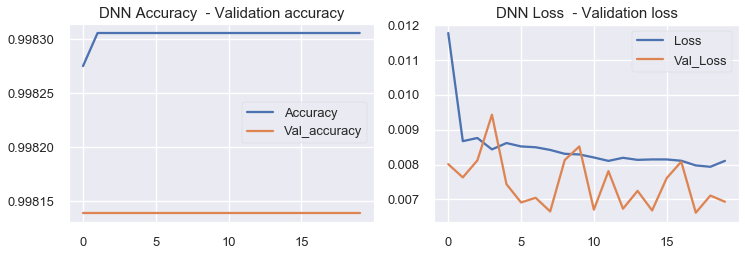

In [103]:
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.title("DNN Accuracy  - Validation accuracy", fontsize=15)
plt.legend()

plt.subplot(2,2,2)
plt.plot(history.history["loss"], label='Loss')
plt.plot(history.history["val_loss"], label='Val_Loss')
plt.title("DNN Loss  - Validation loss", fontsize=15)
plt.legend()

plt.show()